In [113]:
# modules we'll use
import pandas as pd
from textwrap import wrap
import matplotlib.pyplot as plt

In [114]:
# read in all our data
spotify_results = pd.read_csv("../results/genetic_algorithm_stats_2022-01-23_23-54-37.csv")

In [115]:
# look at a few rows of the results file
spotify_results.sample(5)

,Generation number,Best fitness,Best genome,Worst fitness,Worst genome,Mean,Average,Standard deviation
28,28,97.477867,"Genome{fitness:97.47786712646484,genes:[Intege...",99.696991,"Genome{fitness:99.69699096679688,genes:[Intege...",97.919006,97.919006,0.530942
88,88,97.224800,"Genome{fitness:97.22480010986328,genes:[Intege...",99.368774,"Genome{fitness:99.3687744140625,genes:[Integer...",97.609315,97.609315,0.501152
14,14,97.594612,"Genome{fitness:97.59461212158203,genes:[Intege...",99.773712,"Genome{fitness:99.77371215820312,genes:[Intege...",98.368688,98.368688,0.480477
36,36,97.477867,"Genome{fitness:97.47786712646484,genes:[Intege...",98.981194,"Genome{fitness:98.98119354248047,genes:[Intege...",97.749286,97.749286,0.339700
84,84,97.224800,"Genome{fitness:97.22480010986328,genes:[Intege...",101.766655,"Genome{fitness:101.76665496826172,genes:[Integ...",97.765528,97.765528,0.975255


In [116]:
# get info about DataFrame columns
spotify_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Generation number   121 non-null    int64  
 1   Best fitness        121 non-null    float64
 2   Best genome         121 non-null    object 
 3   Worst fitness       121 non-null    float64
 4   Worst genome        121 non-null    object 
 5   Mean                121 non-null    float64
 6   Average             121 non-null    float64
 7   Standard deviation  121 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 7.7+ KB


In [117]:
plt.rcParams["figure.dpi"] = 400

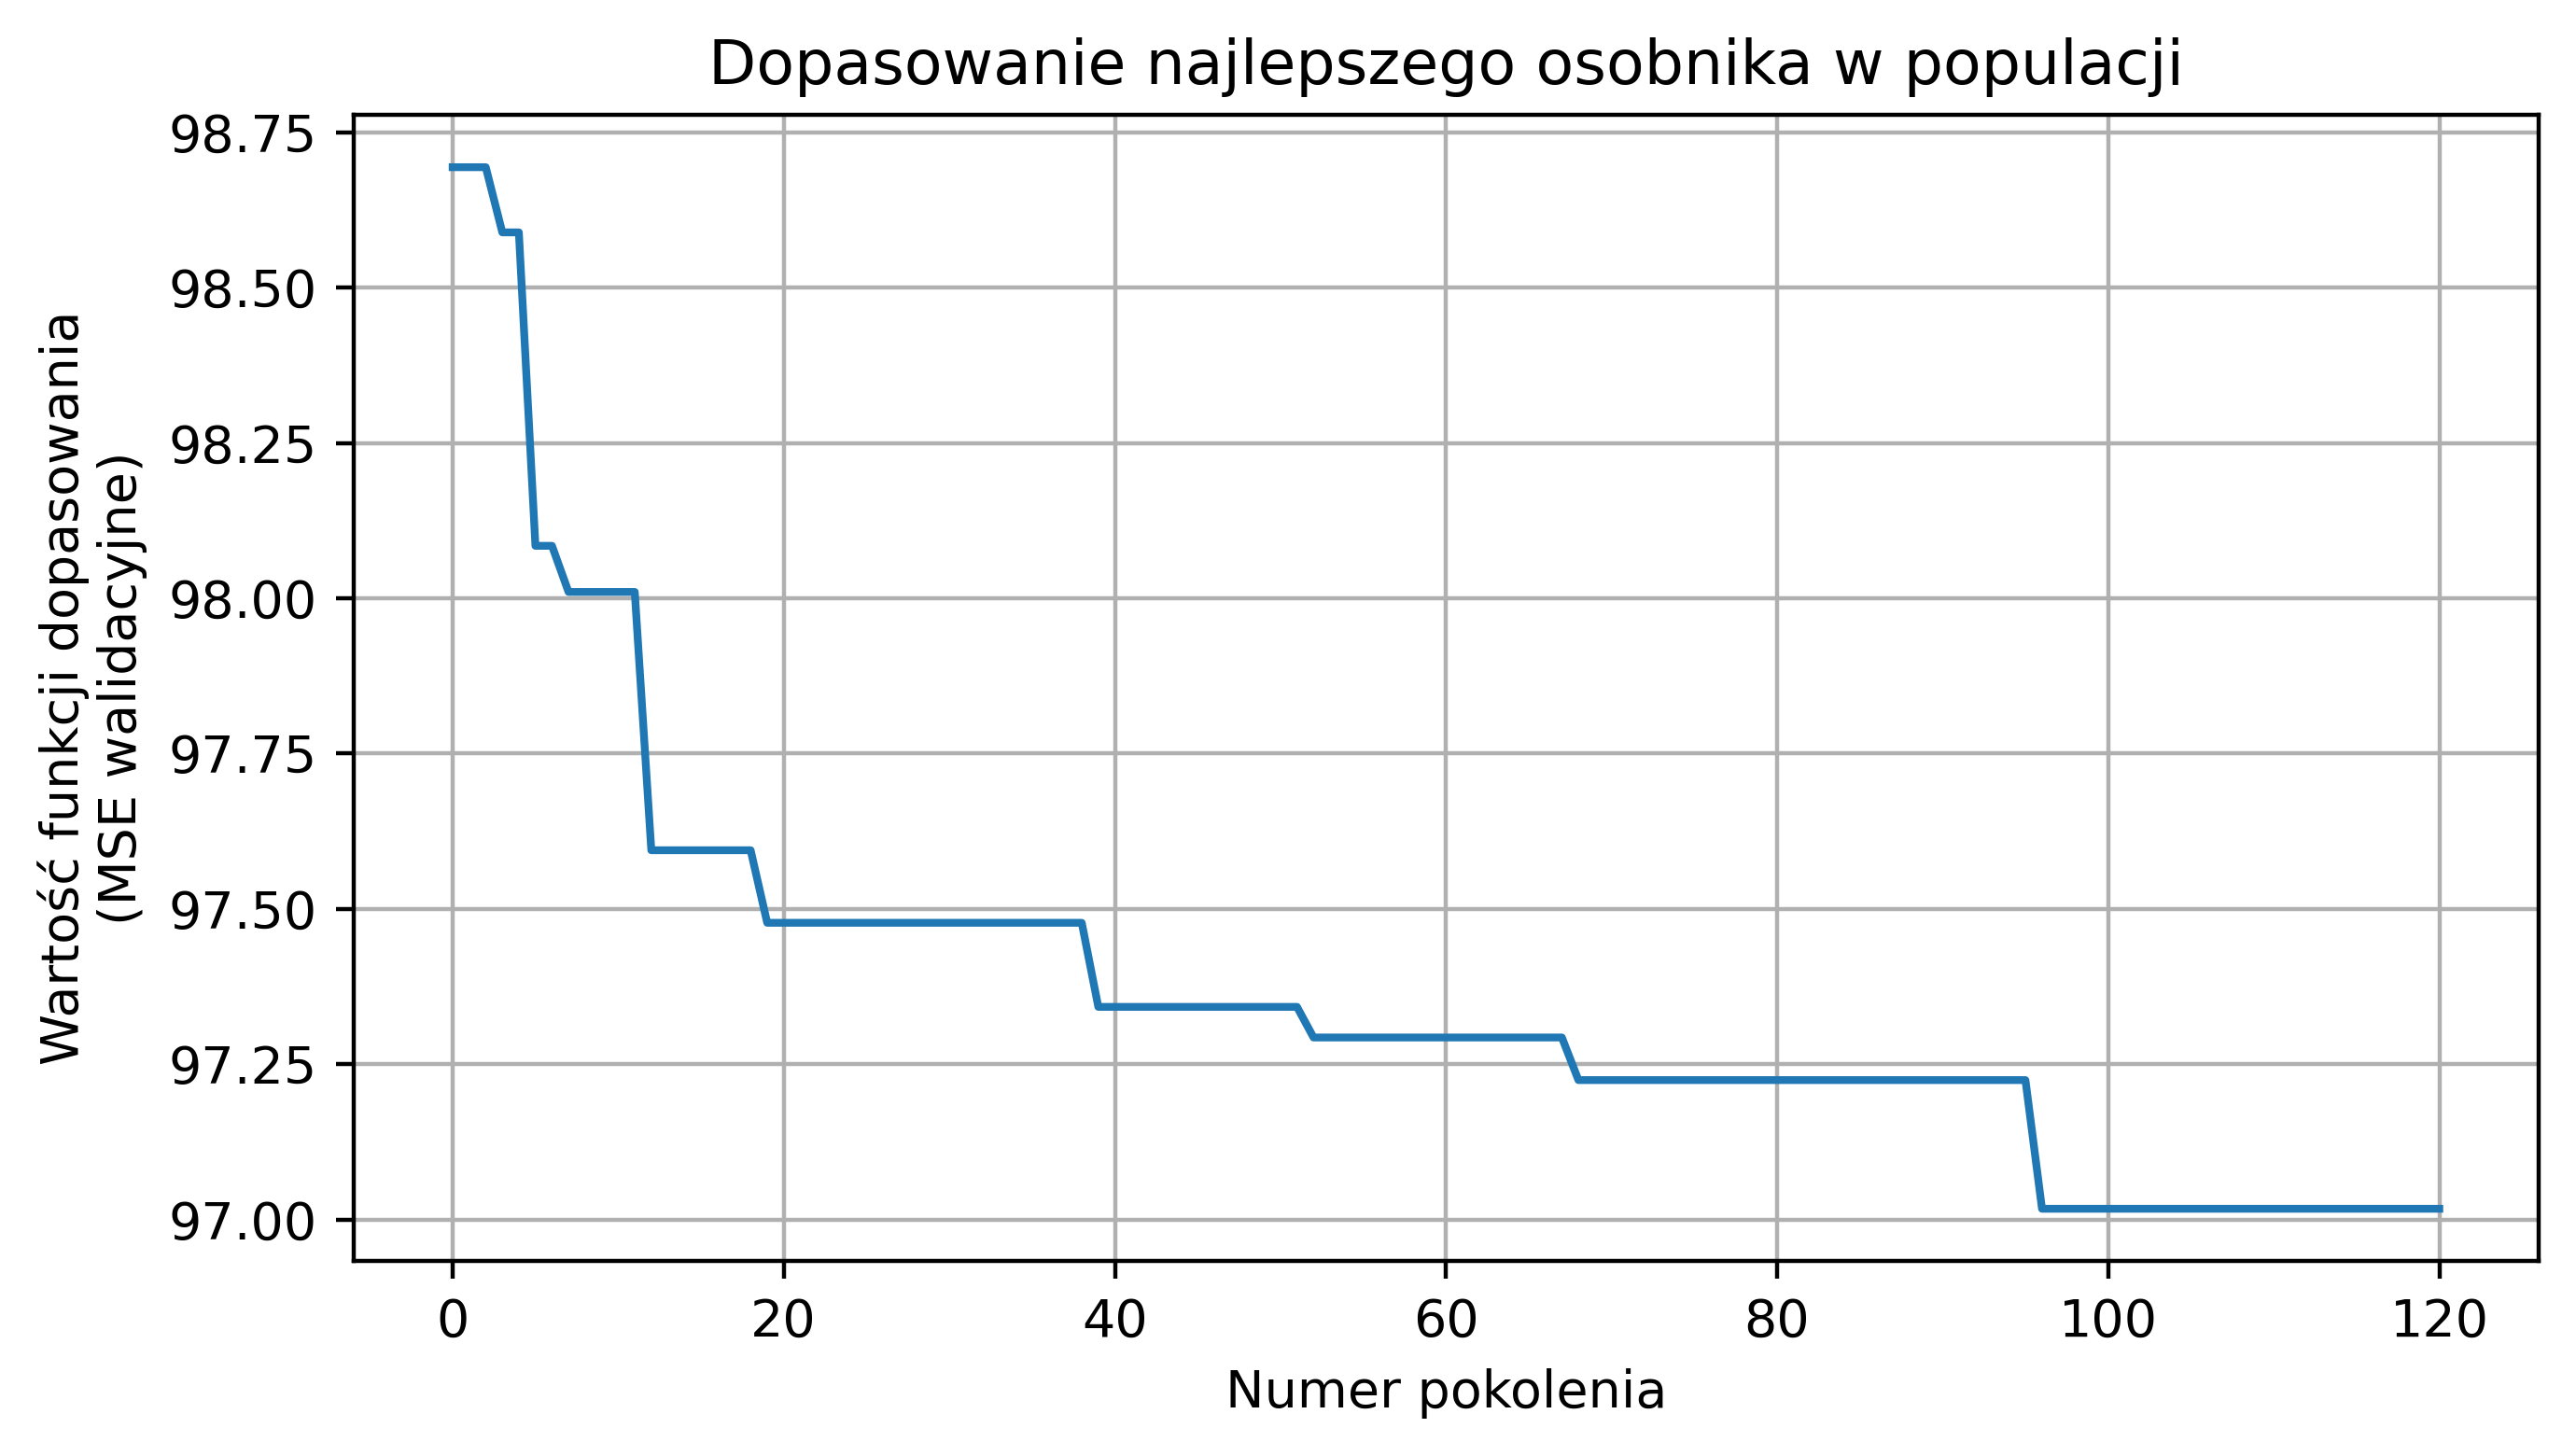

In [118]:
ax = spotify_results.plot(x='Generation number', y='Best fitness', title='Dopasowanie najlepszego osobnika w populacji',
                          grid=True, legend=False, figsize=(7, 4))
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Wartość funkcji dopasowania (MSE walidacyjne)', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_best_fitness.eps')

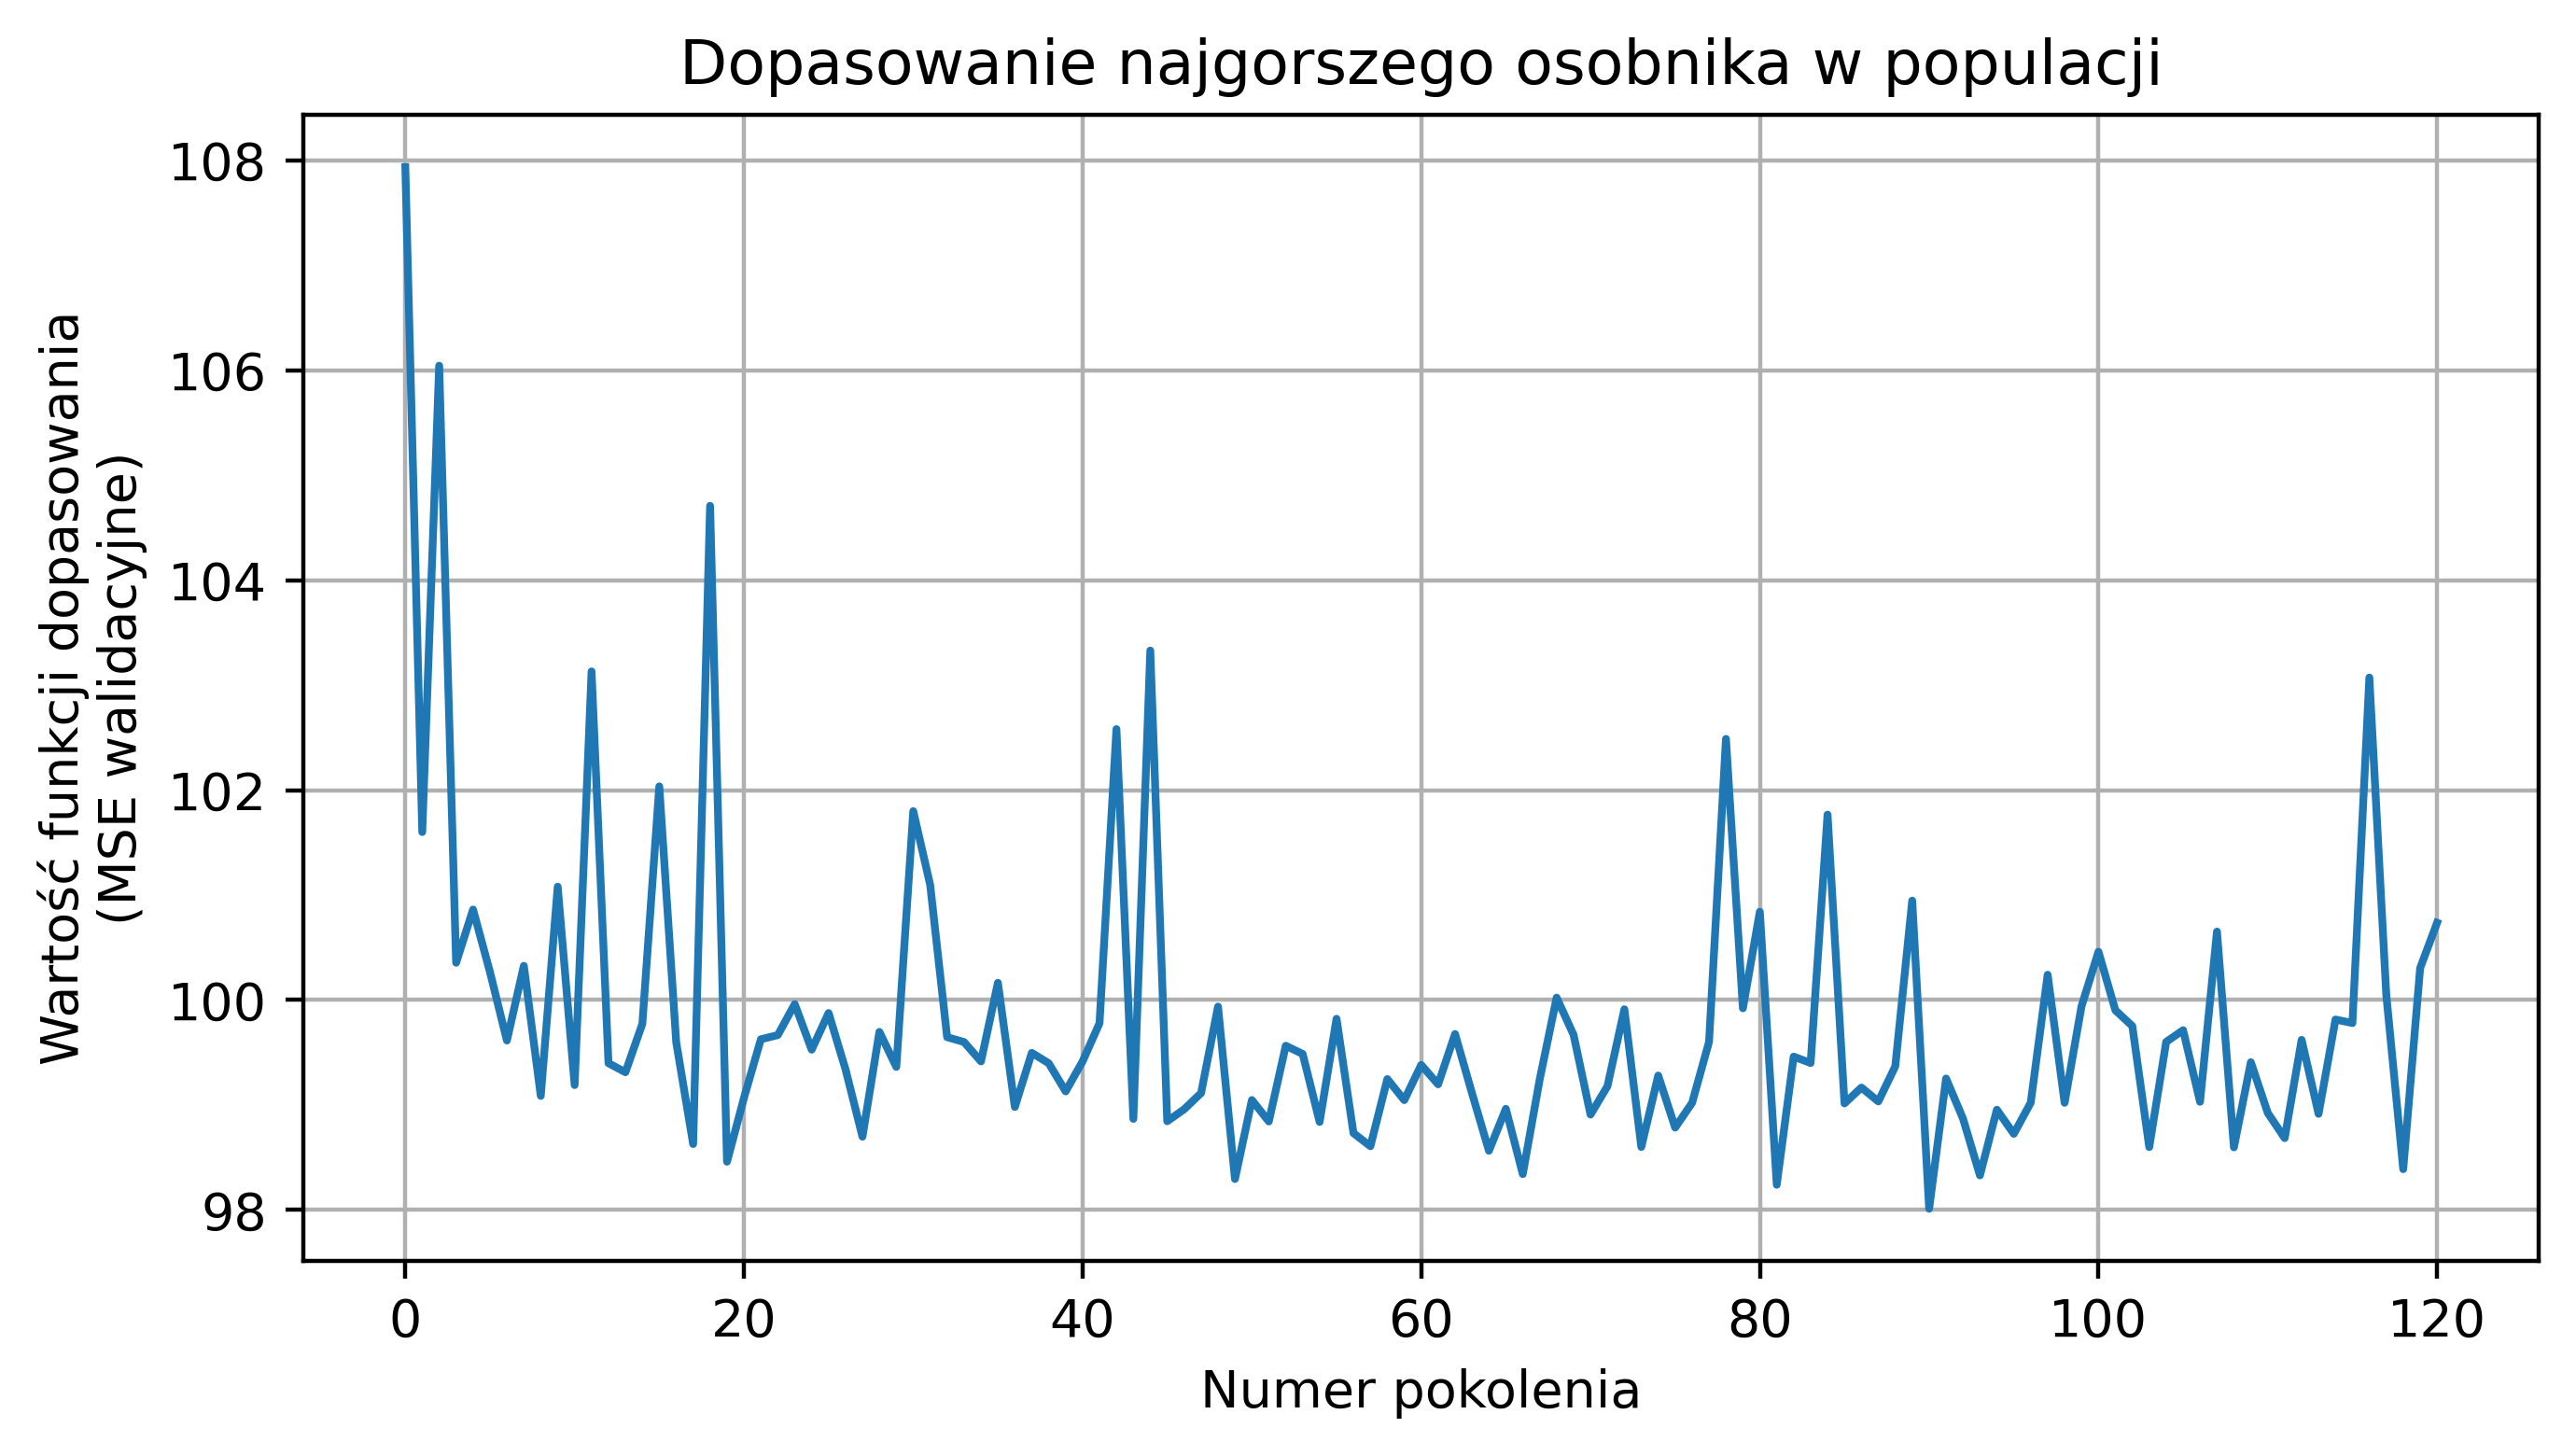

In [119]:
ax = spotify_results.plot(x='Generation number', y='Worst fitness',
                          title='Dopasowanie najgorszego osobnika w populacji', grid=True, legend=False, figsize=(7, 4))
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Wartość funkcji dopasowania (MSE walidacyjne)', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_worst_fitness.eps')

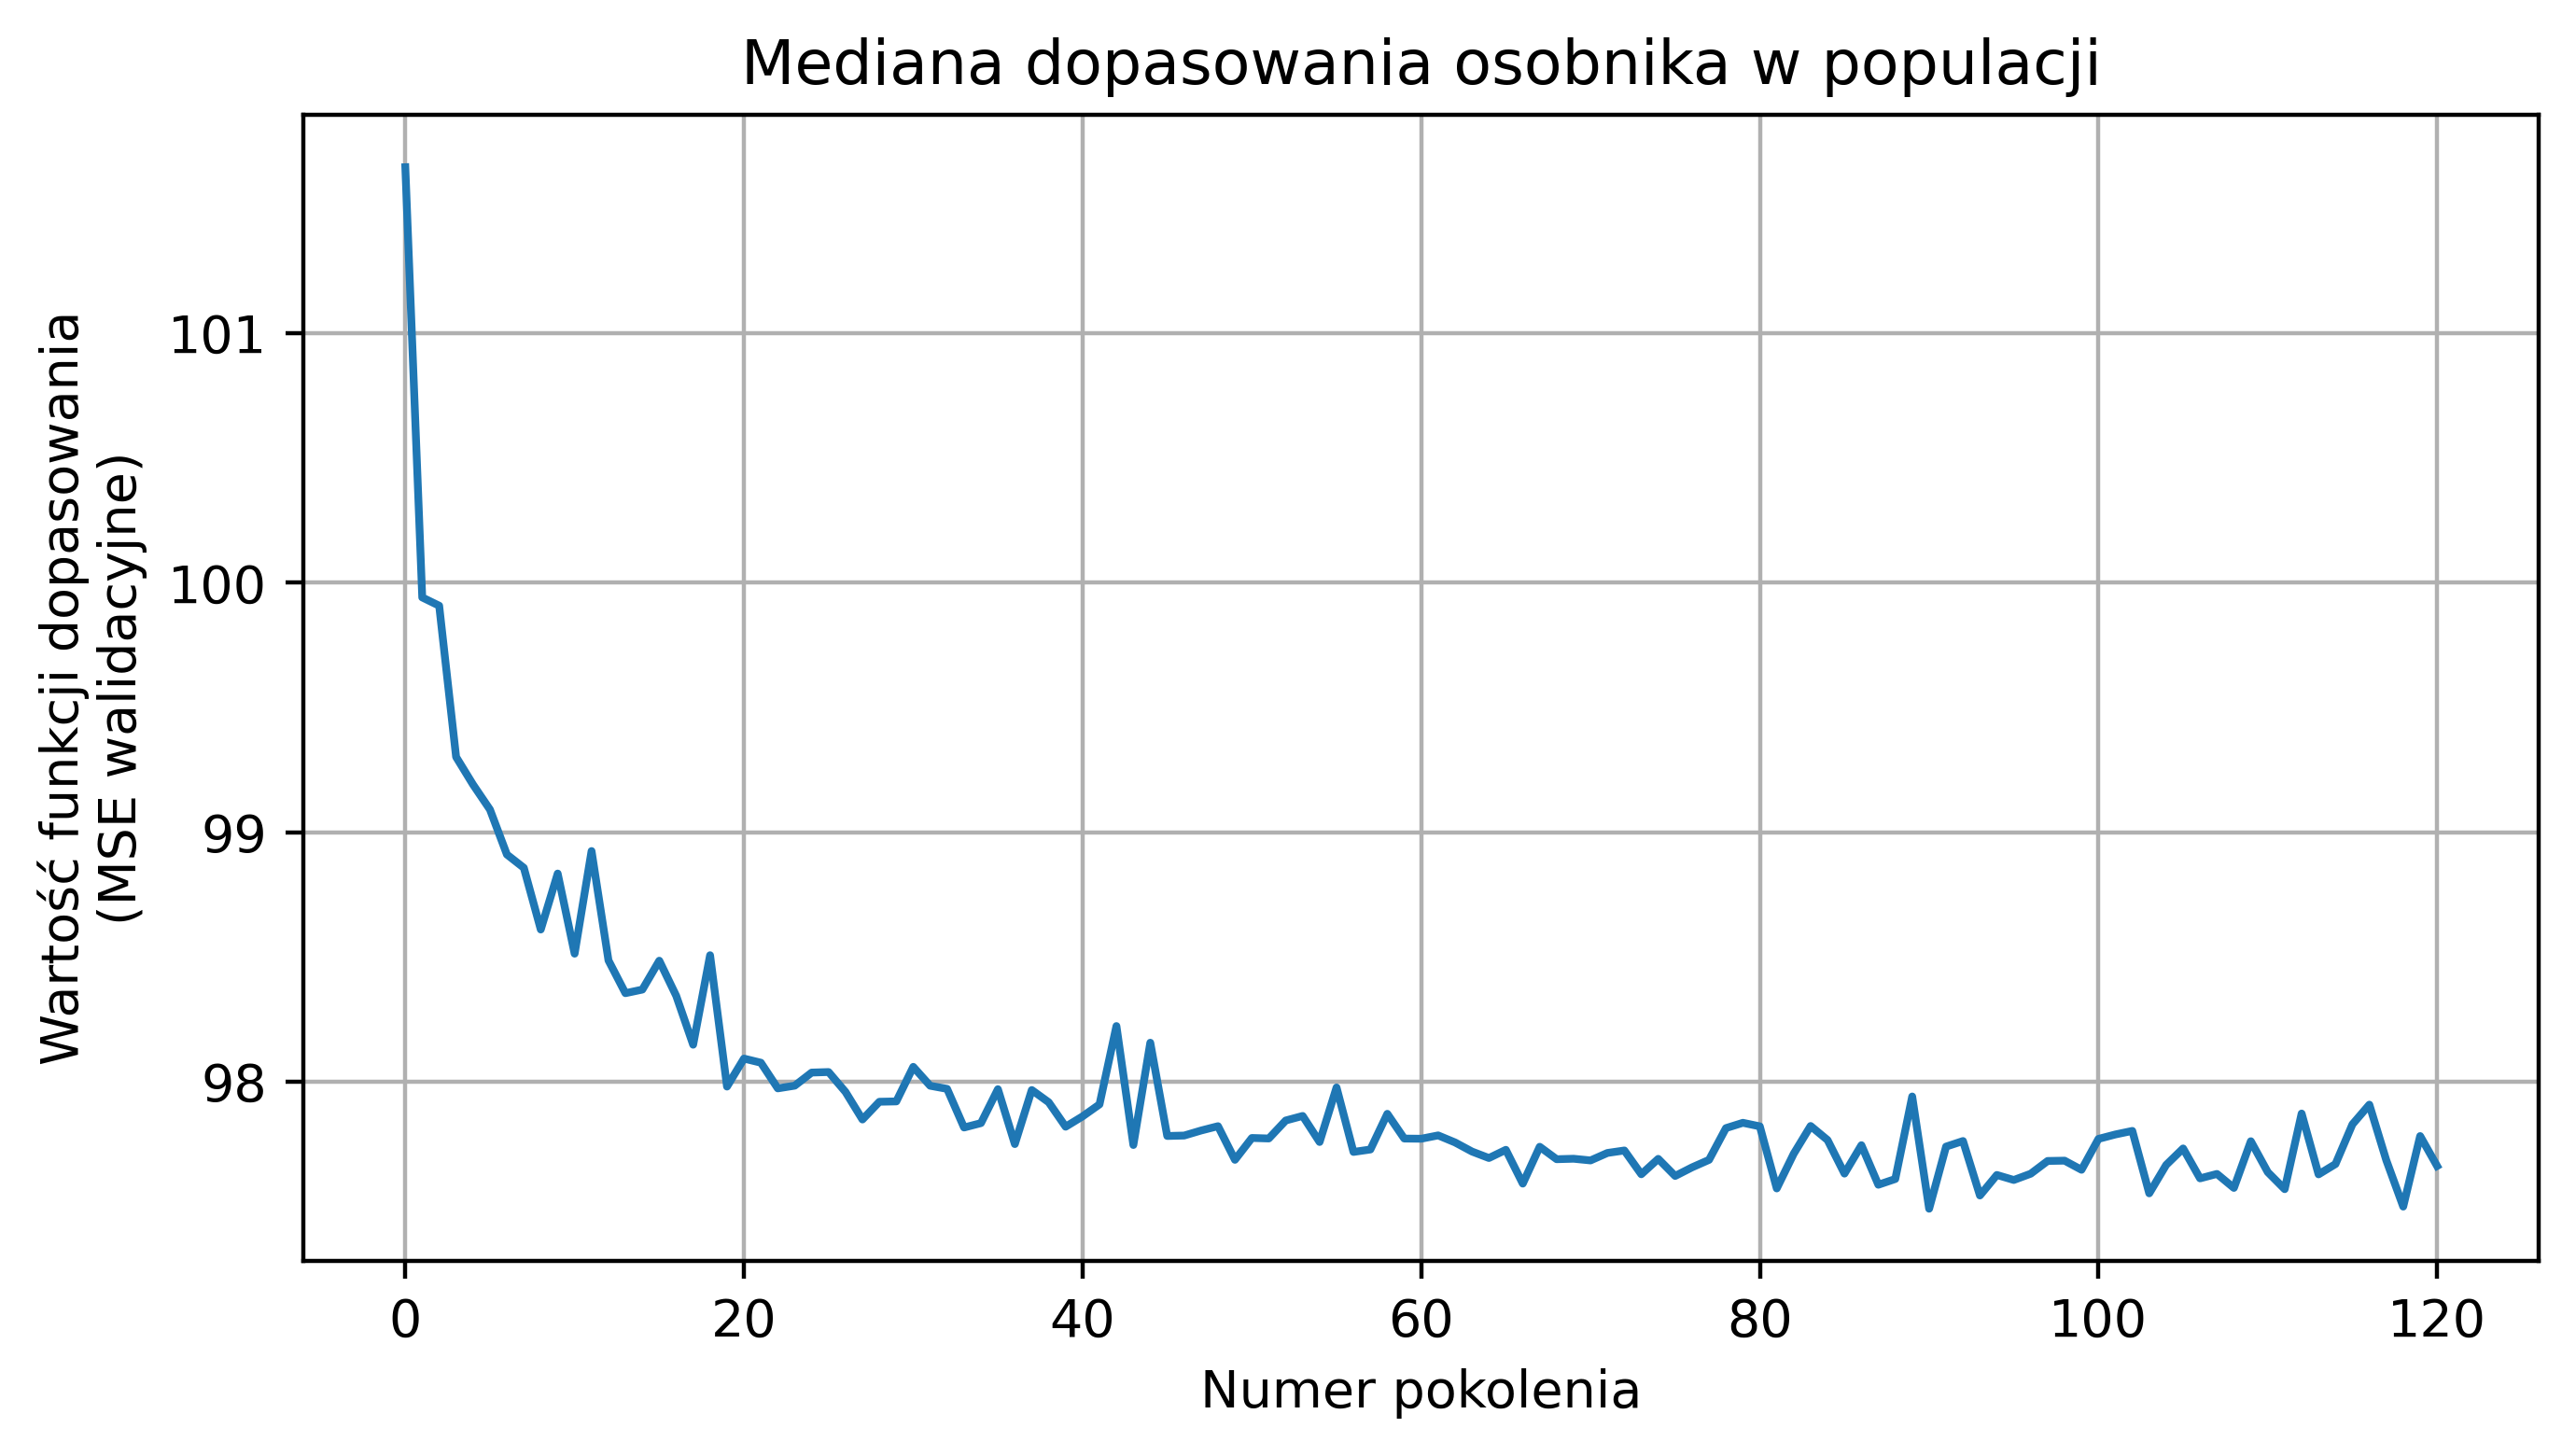

In [120]:
ax = spotify_results.plot(x='Generation number', y='Mean',
                          title='Mediana dopasowania osobnika w populacji', grid=True, legend=False, figsize=(7, 4))
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Wartość funkcji dopasowania (MSE walidacyjne)', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_mean_fitness.eps')

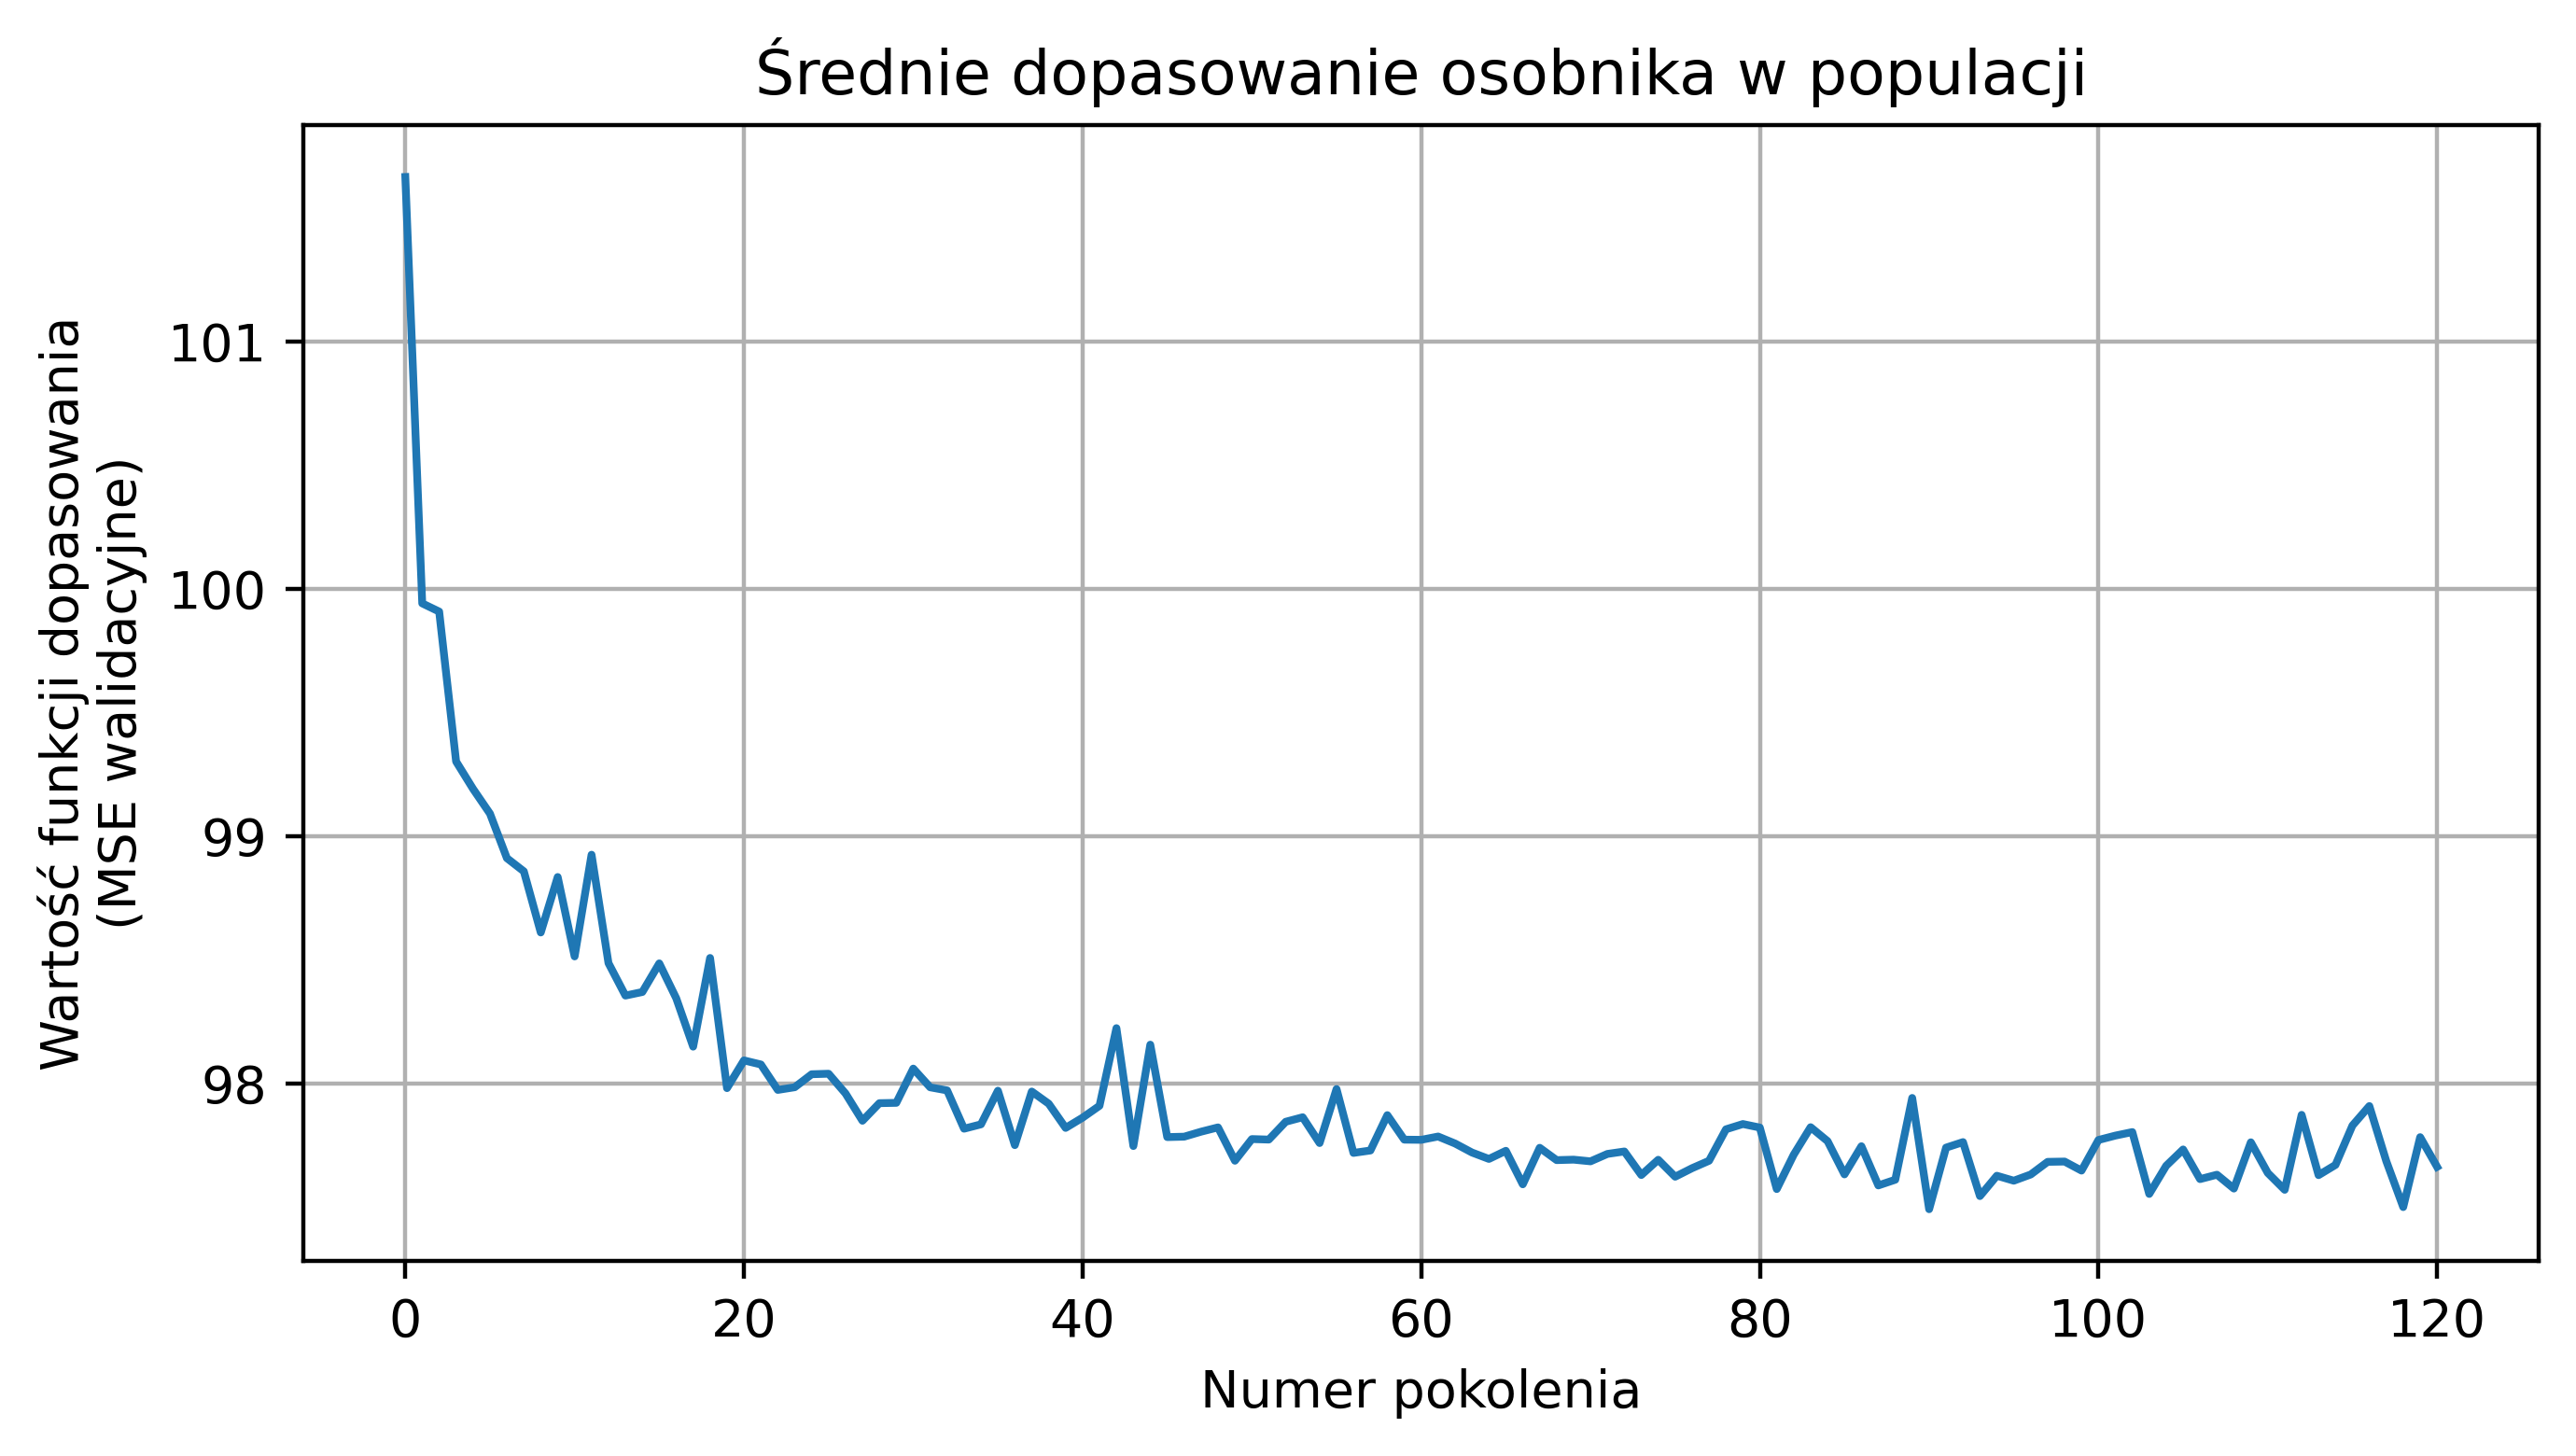

In [121]:
ax = spotify_results.plot(x='Generation number', y='Average',
                          title='Średnie dopasowanie osobnika w populacji', grid=True, legend=False, figsize=(7, 4))
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Wartość funkcji dopasowania (MSE walidacyjne)', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_average_fitness.eps')

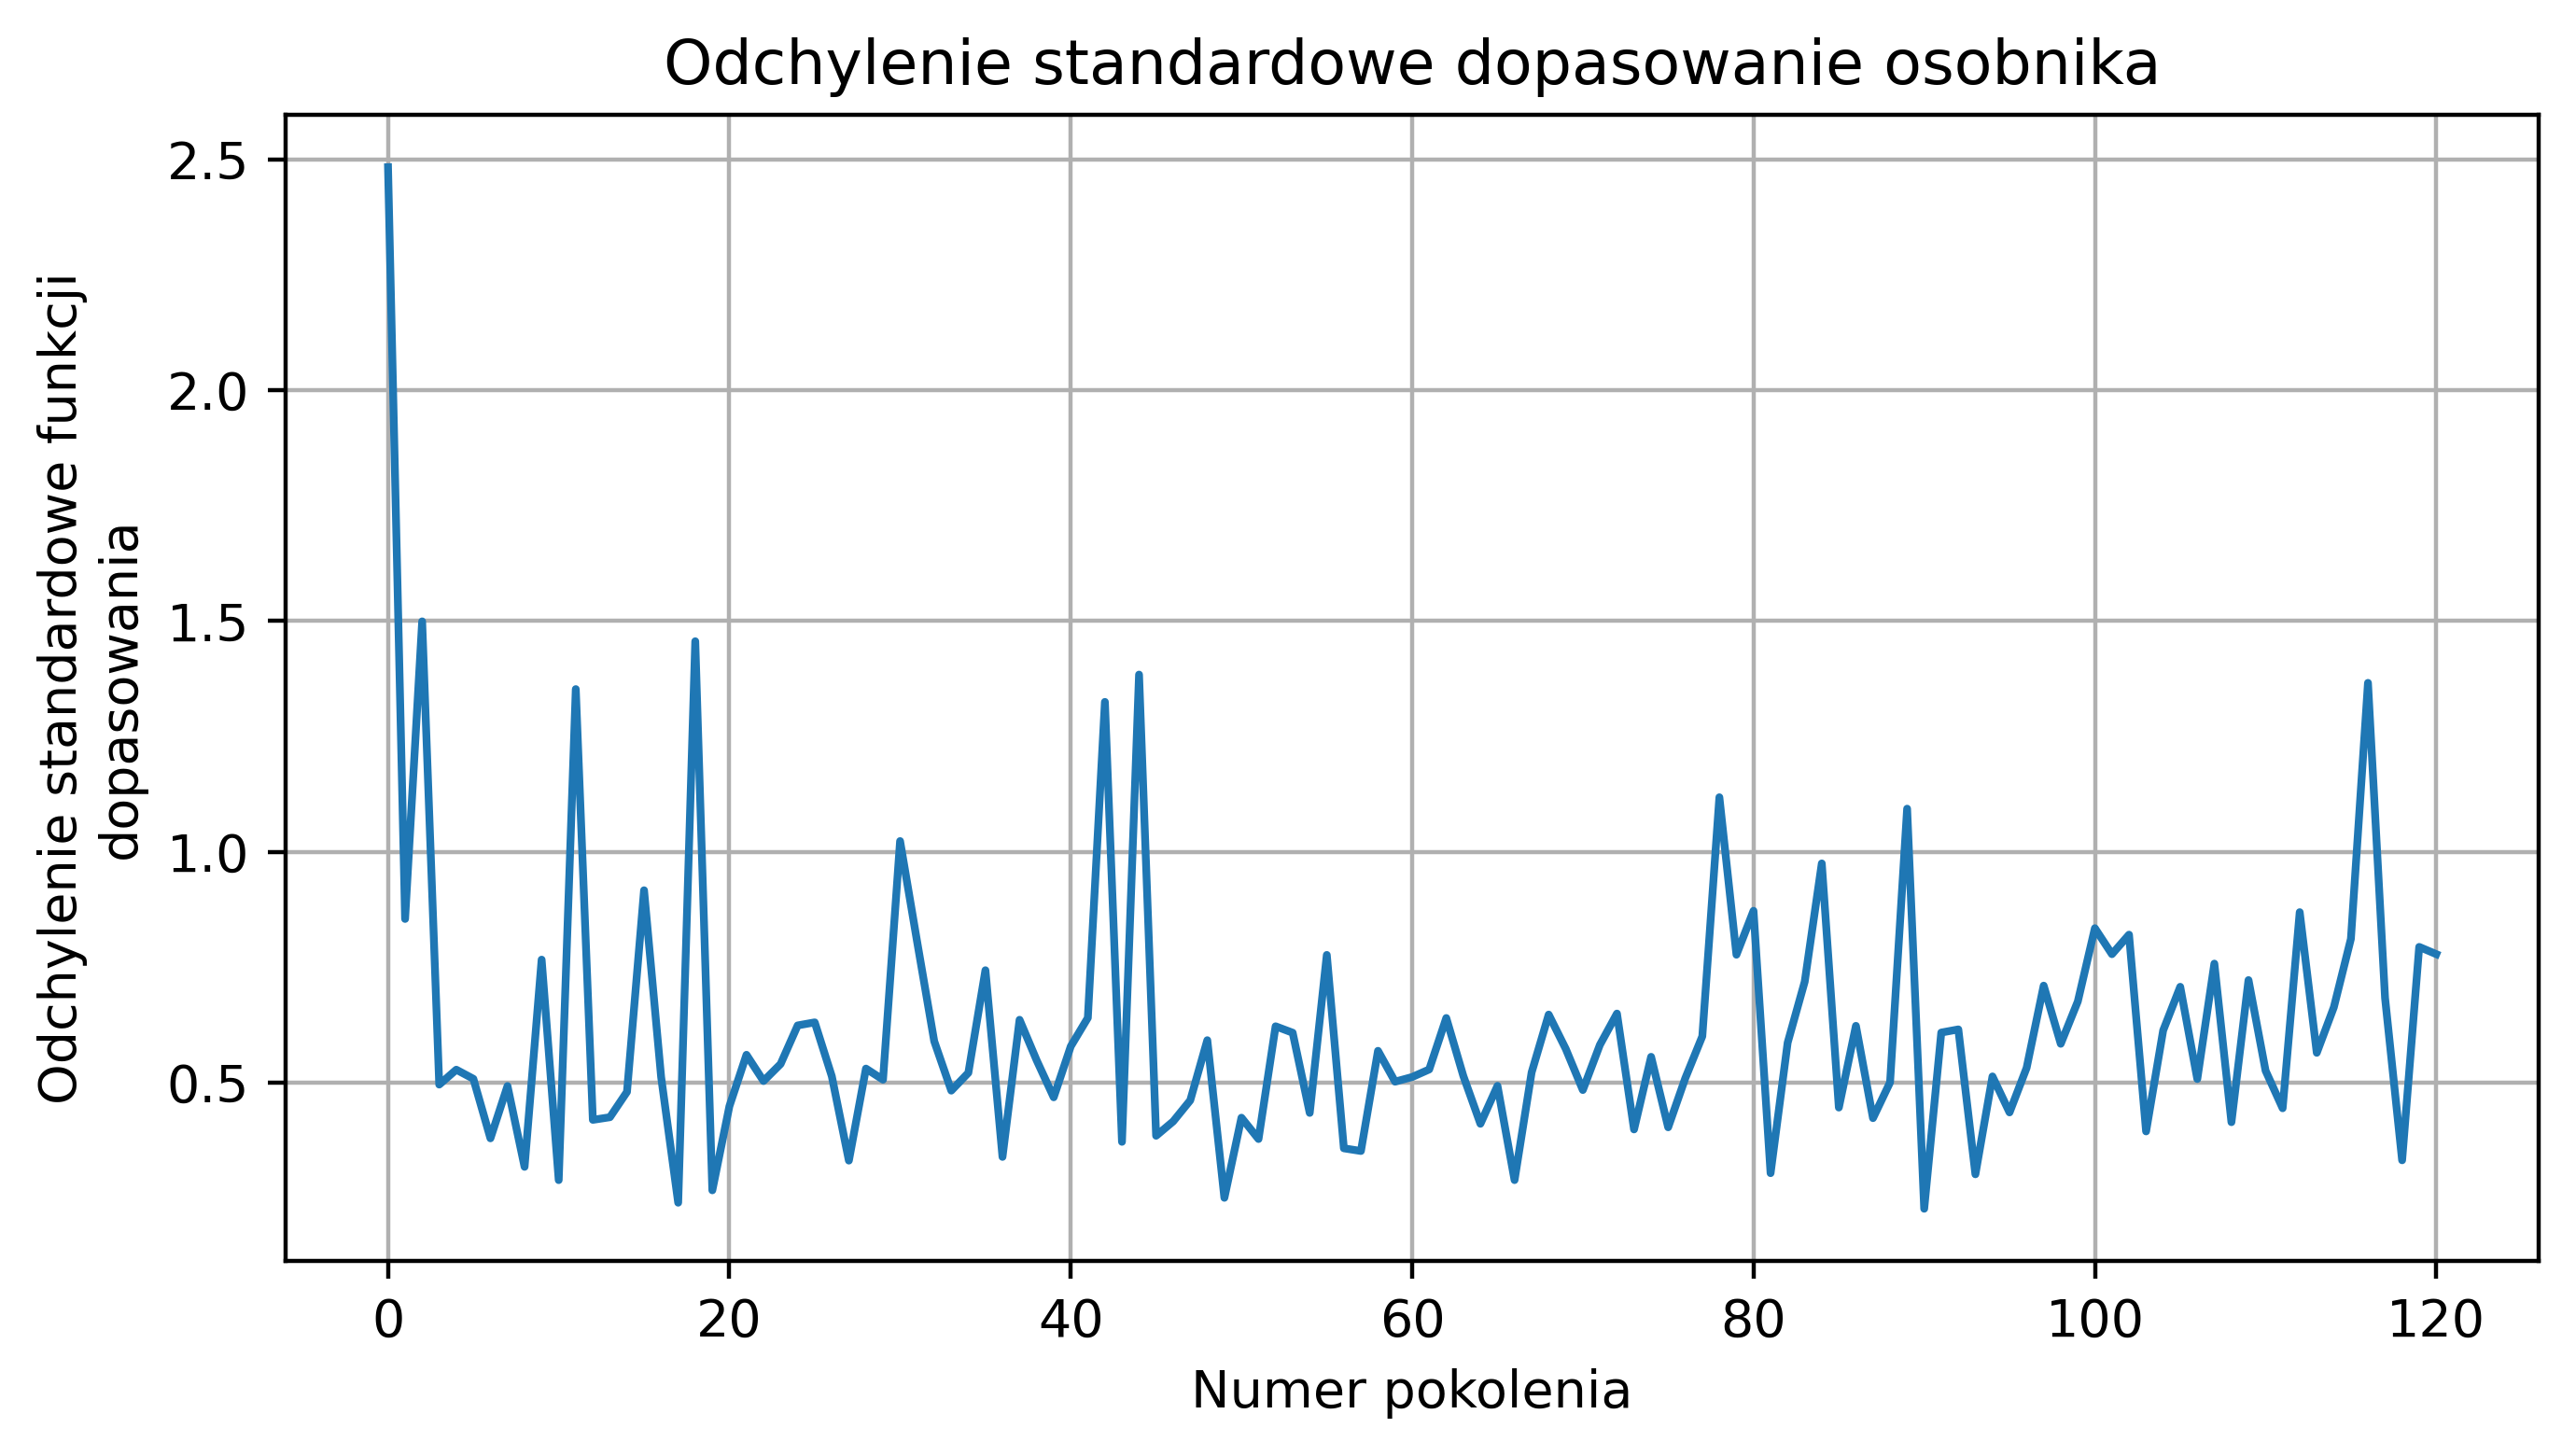

In [122]:
ax = spotify_results.plot(x='Generation number', y='Standard deviation',
                          title='Odchylenie standardowe dopasowanie osobnika', grid=True, legend=False, figsize=(7, 4))
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Odchylenie standardowe funkcji dopasowania', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_fitness_standard_deviation.eps')

In [123]:
# extract values of parameters for the best genome
best_genome_param_values = spotify_results['Best genome'].str.split(',genes:').str[1].str.extract(
    '\[IntegerGene\{label:hidden_1_units,min:10,max:200,val:(\d+)\},FloatGene\{label:hidden_1_dropout_rate,min:0.01,max:0.5,val:(\d+\.\d+)\},IntegerGene\{label:hidden_2_units,min:10,max:200,val:(\d+)\},FloatGene\{label:hidden_2_dropout_rate,min:0.01,max:0.5,val:(\d+\.\d+)\},IntegerGene\{label:hidden_3_units,min:10,max:200,val:(\d+)\},FloatGene\{label:hidden_3_dropout_rate,min:0.01,max:0.5,val:(\d+\.\d+)\},IntegerGene\{label:batch_size,min:100,max:400,val:(\d+)\},\]\}')
best_genome_param_values[0] = best_genome_param_values[0].astype(int)
best_genome_param_values[1] = best_genome_param_values[1].astype(float)
best_genome_param_values[2] = best_genome_param_values[2].astype(int)
best_genome_param_values[3] = best_genome_param_values[3].astype(float)
best_genome_param_values[4] = best_genome_param_values[4].astype(int)
best_genome_param_values[5] = best_genome_param_values[5].astype(float)
best_genome_param_values[6] = best_genome_param_values[6].astype(int)
best_genome_param_values[7] = spotify_results['Generation number']
best_genome_param_values.rename(
    columns={0: 'hidden_1_units', 1: 'hidden_1_dropout_rate', 2: 'hidden_2_units', 3: 'hidden_2_dropout_rate',
             4: 'hidden_3_units', 5: 'hidden_3_dropout_rate', 6: 'batch_size', 7: 'generation_number'}, inplace=True)

In [124]:
best_genome_param_values.sample(5)

,hidden_1_units,hidden_1_dropout_rate,hidden_2_units,hidden_2_dropout_rate,hidden_3_units,hidden_3_dropout_rate,batch_size,generation_number
33,106,0.074093,117,0.111960,116,0.010000,100,33
100,181,0.103798,112,0.095674,55,0.010000,100,100
2,106,0.222686,124,0.163316,98,0.019772,228,2
113,181,0.103798,112,0.095674,55,0.010000,100,113
35,106,0.074093,117,0.111960,116,0.010000,100,35


In [125]:
best_genome_param_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hidden_1_units         121 non-null    int32  
 1   hidden_1_dropout_rate  121 non-null    float64
 2   hidden_2_units         121 non-null    int32  
 3   hidden_2_dropout_rate  121 non-null    float64
 4   hidden_3_units         121 non-null    int32  
 5   hidden_3_dropout_rate  121 non-null    float64
 6   batch_size             121 non-null    int32  
 7   generation_number      121 non-null    int64  
dtypes: float64(3), int32(4), int64(1)
memory usage: 5.8 KB


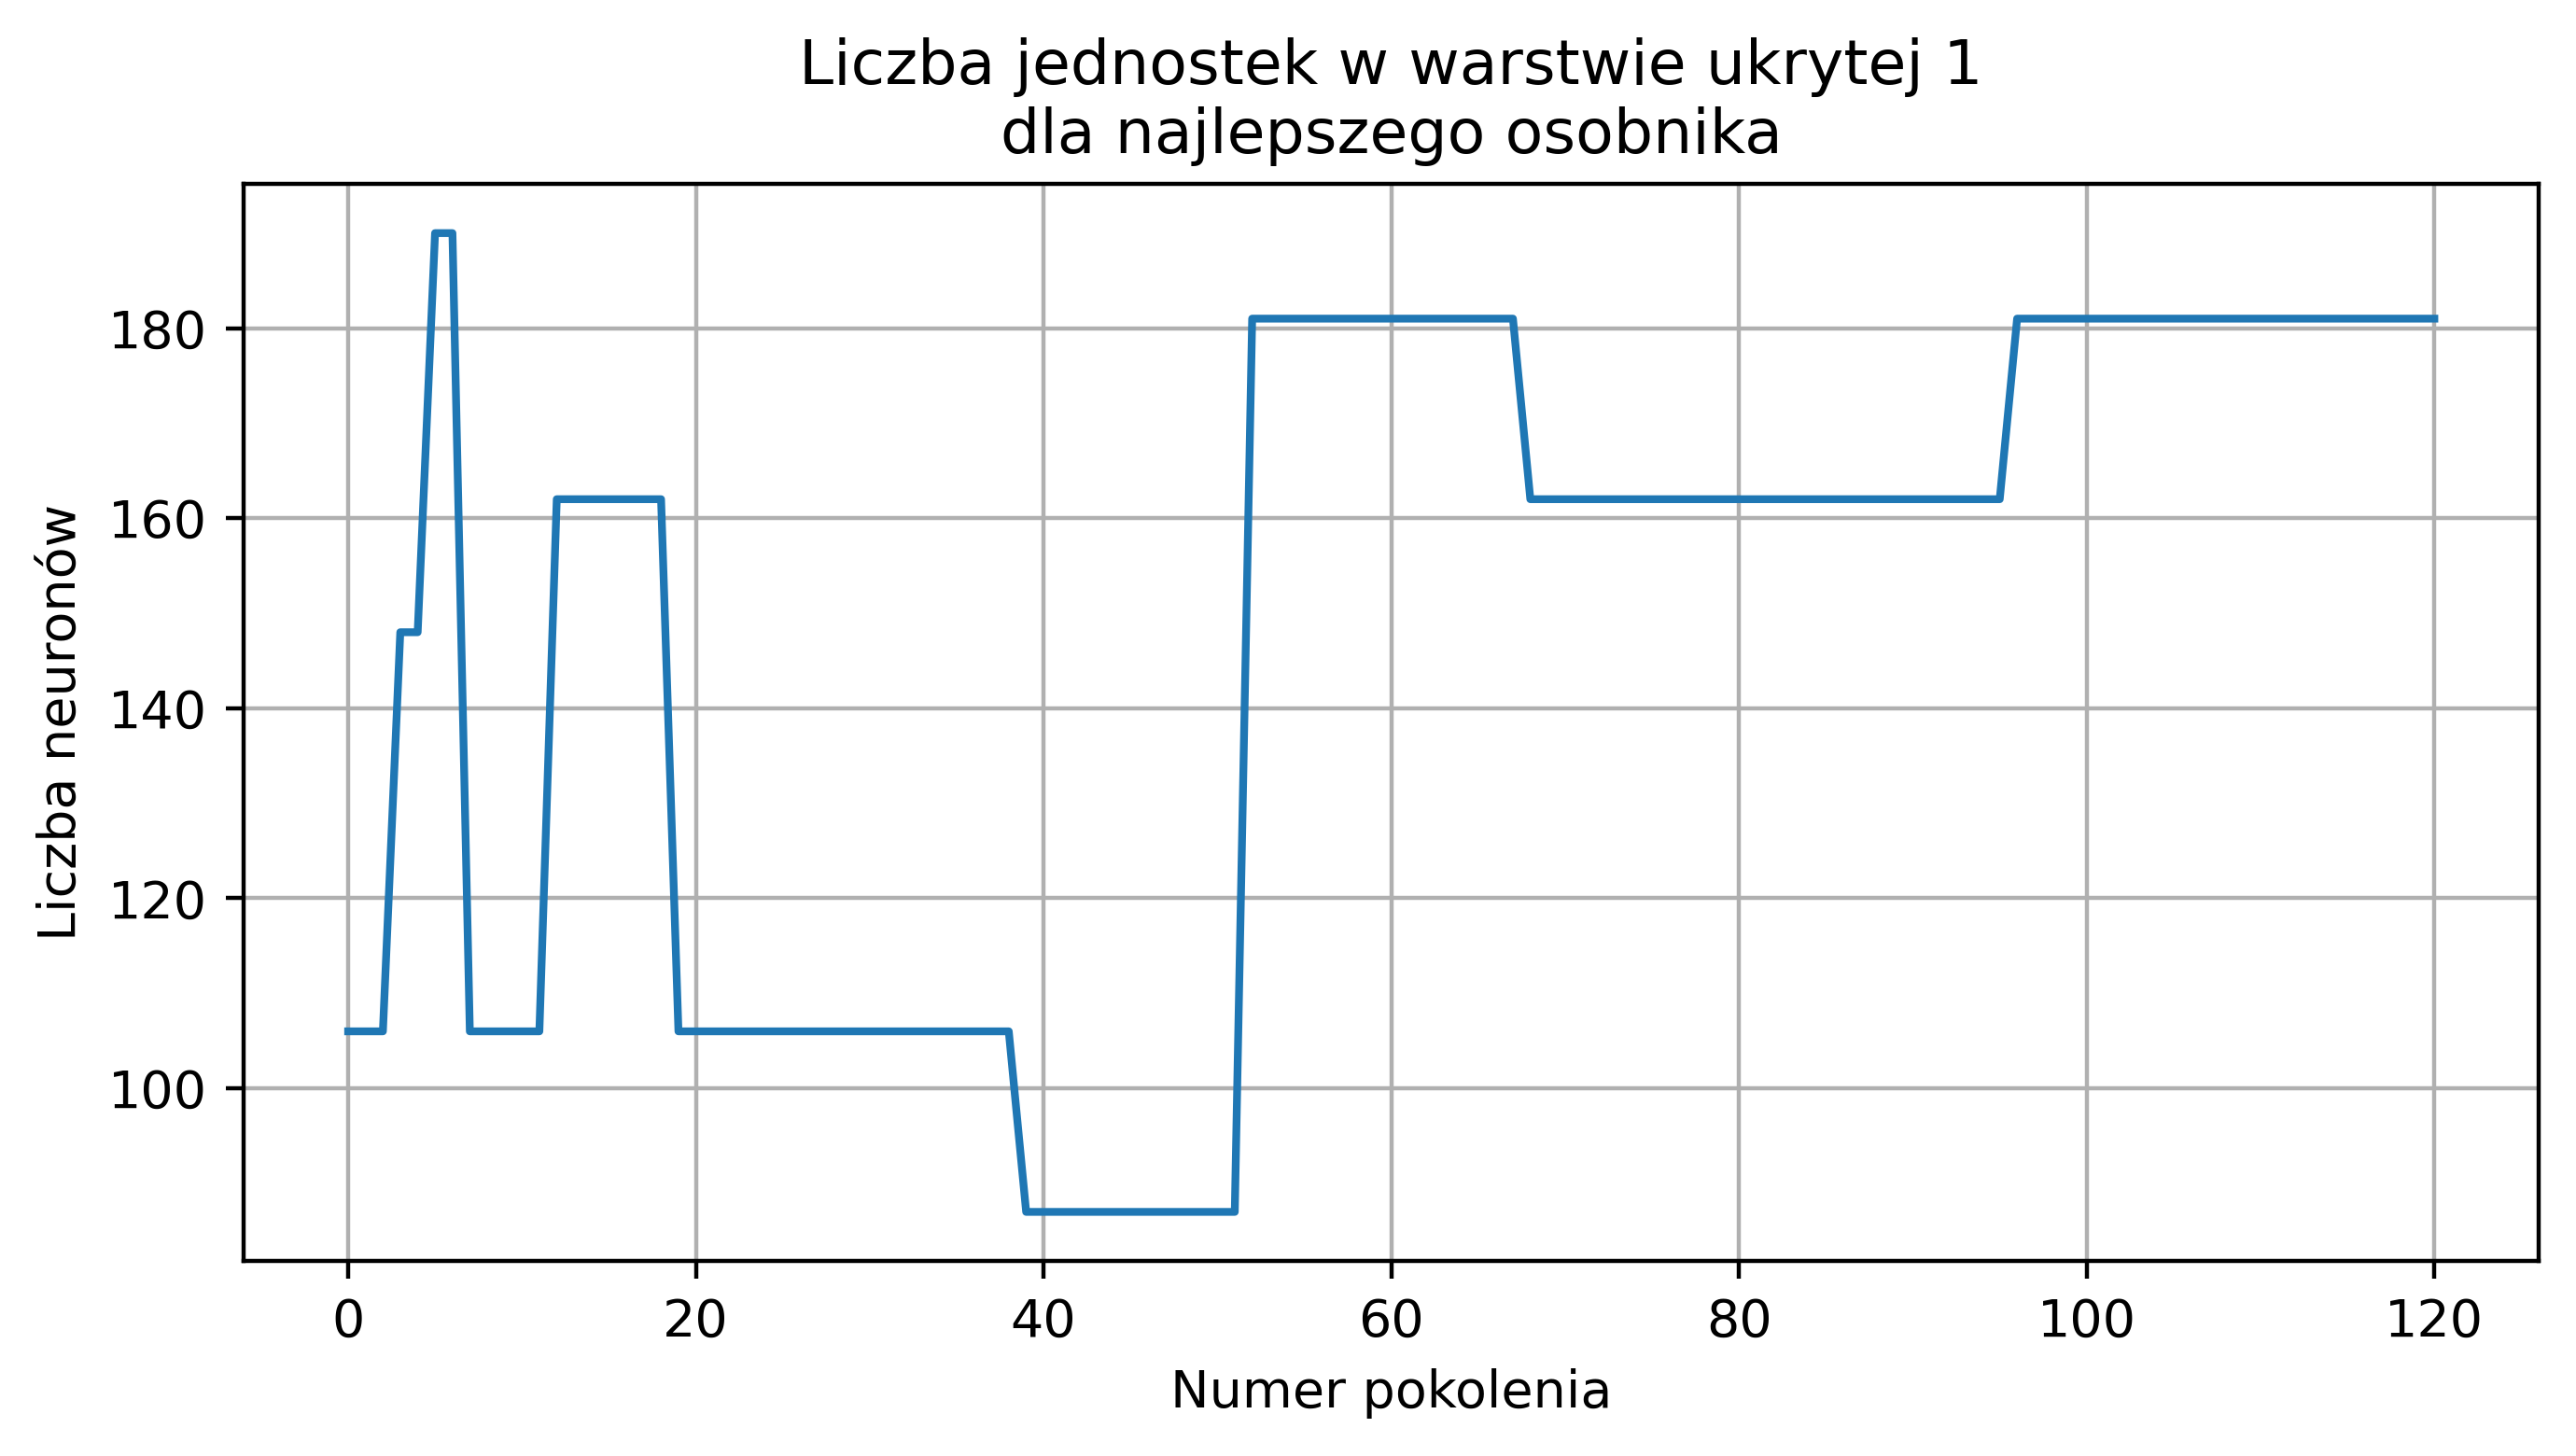

In [126]:
ax = best_genome_param_values.plot(x='generation_number', y='hidden_1_units',
                                   title='\n'.join(
                                       wrap('Liczba jednostek w warstwie ukrytej 1 dla najlepszego osobnika', 40)),
                                   grid=True, legend=False, figsize=(7, 4))
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Liczba neuronów', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_best_hidden_1_units.eps')

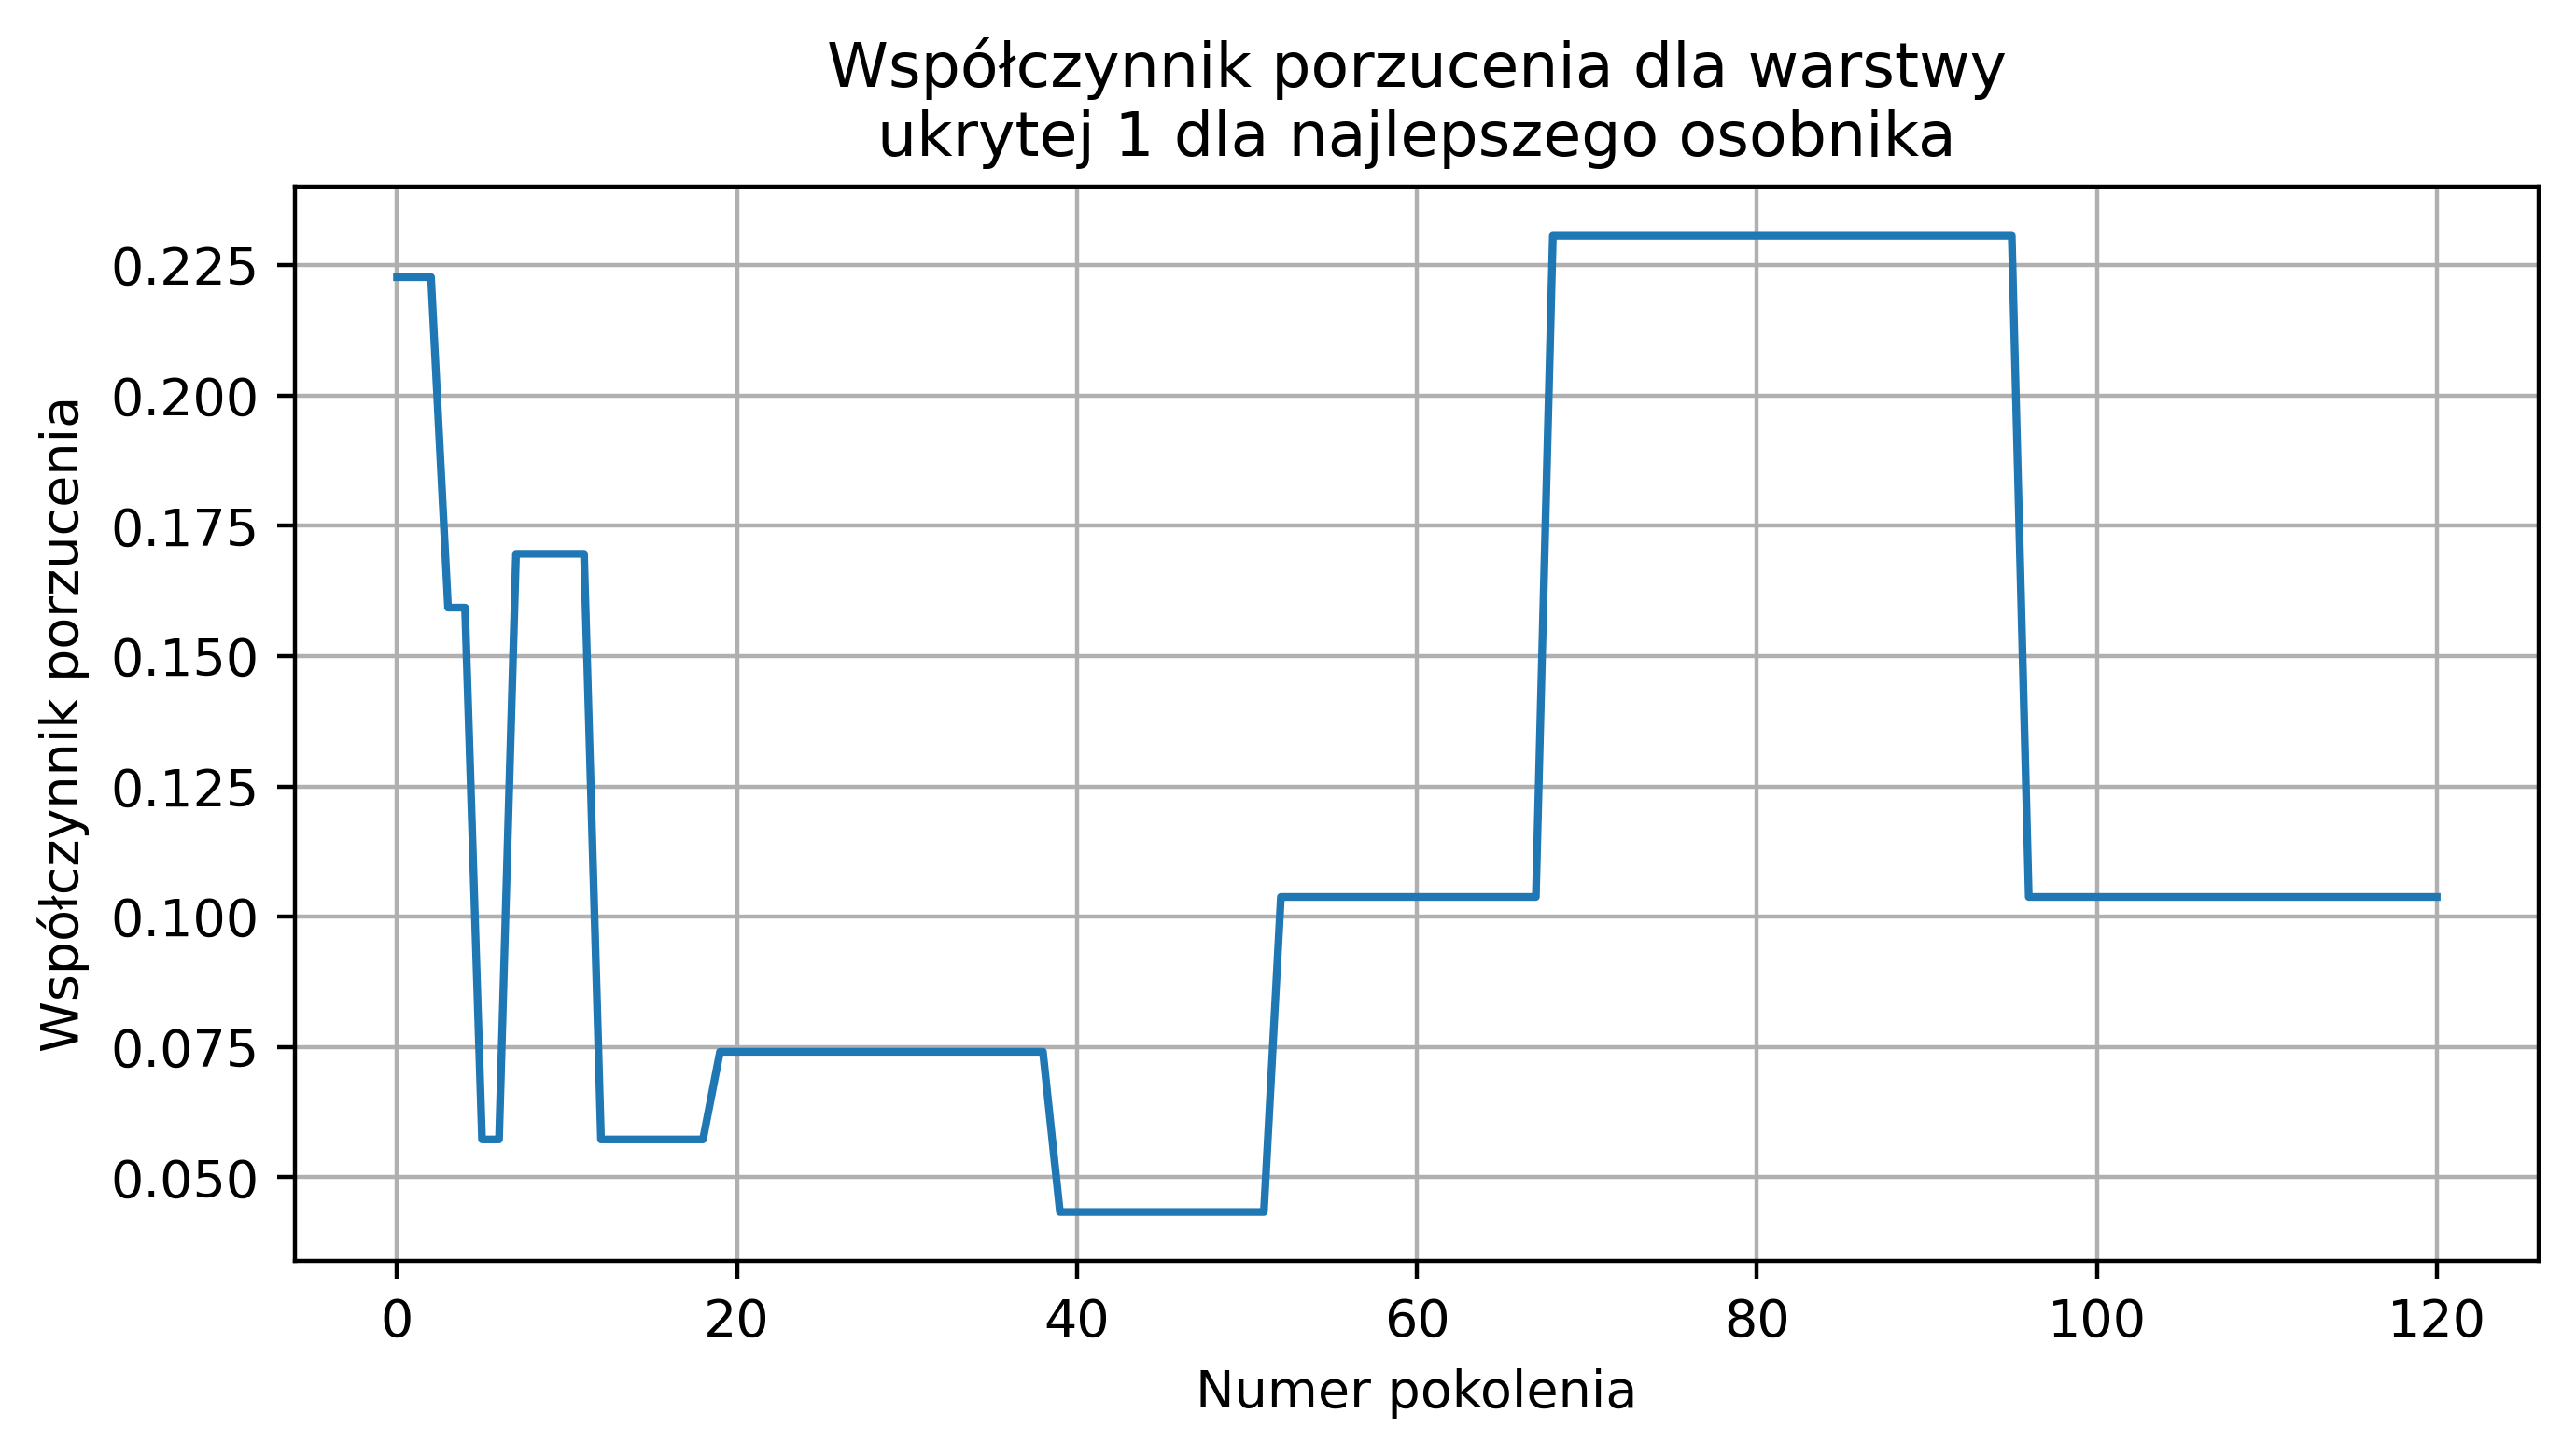

In [127]:
ax = best_genome_param_values.plot(x='generation_number', y='hidden_1_dropout_rate',
                                   title='\n'.join(
                                       wrap('Współczynnik porzucenia dla warstwy ukrytej 1 dla najlepszego osobnika',
                                            40)), grid=True, legend=False, figsize=(7, 4))
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Współczynnik porzucenia', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_best_hidden_1_dropout_rate.eps')

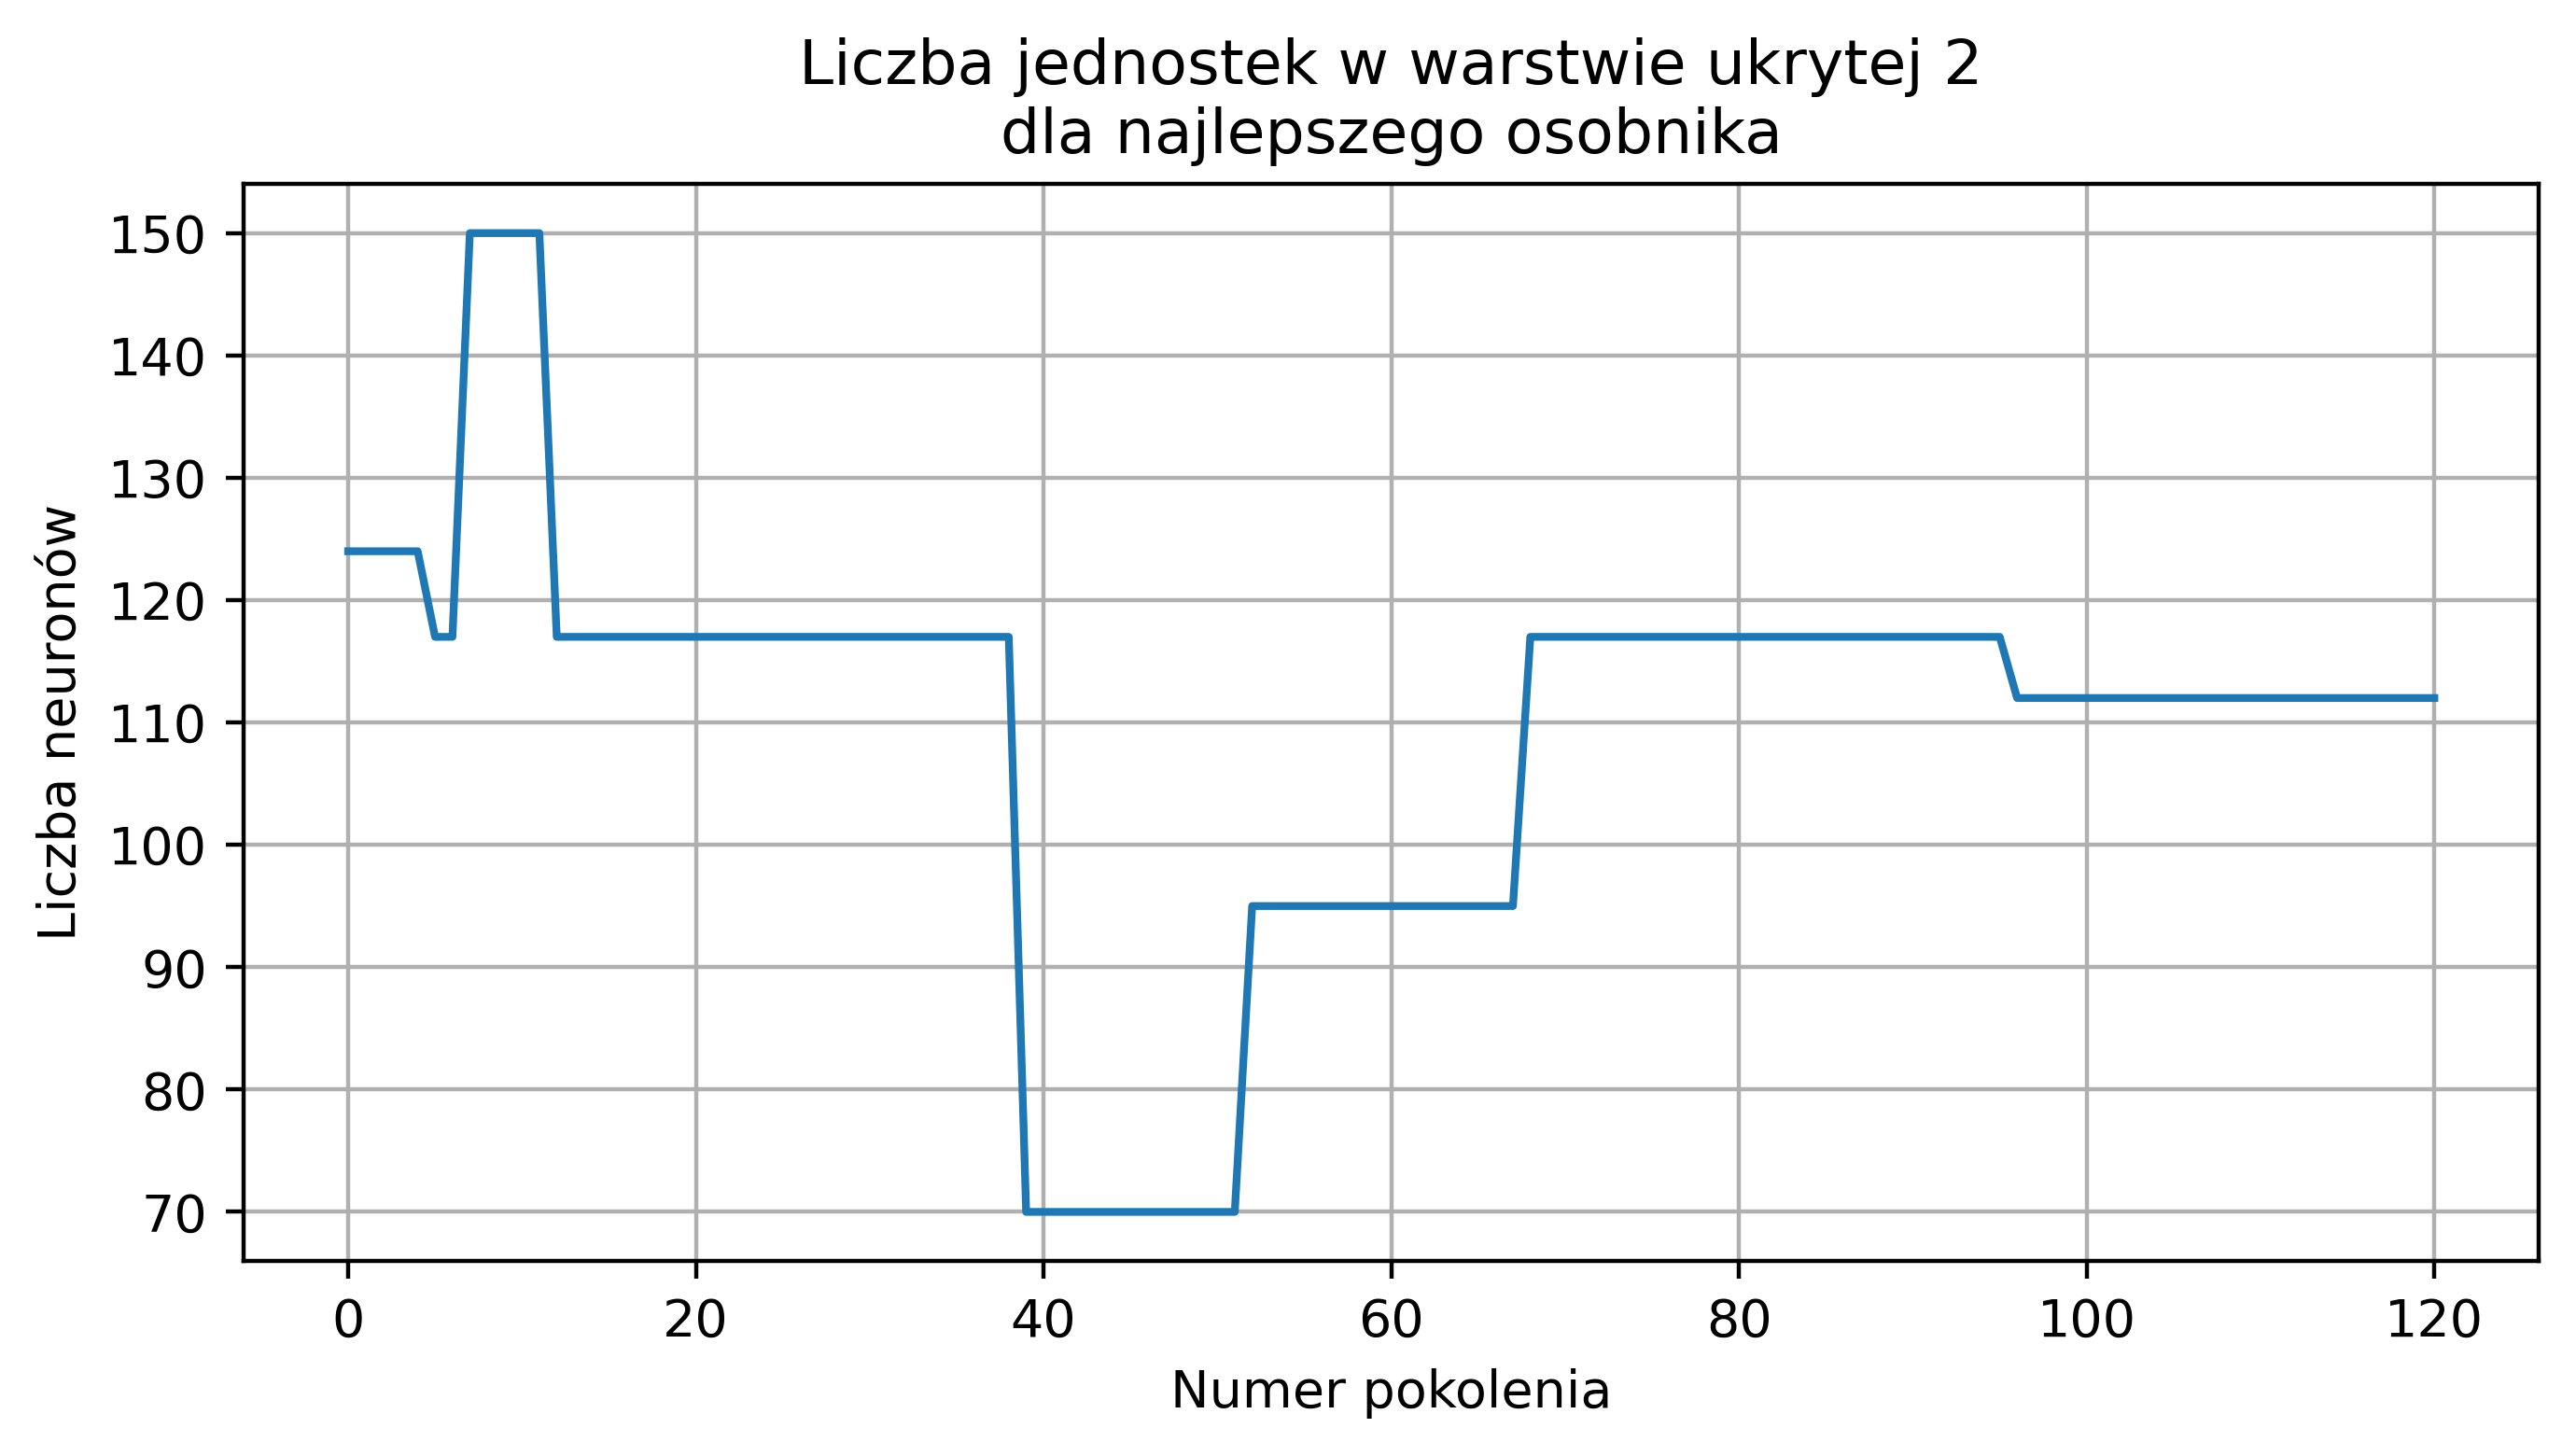

In [128]:
ax = best_genome_param_values.plot(x='generation_number', y='hidden_2_units',
                                   title='\n'.join(
                                       wrap('Liczba jednostek w warstwie ukrytej 2 dla najlepszego osobnika', 40)),
                                   grid=True, legend=False, figsize=(7, 4))
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Liczba neuronów', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_best_hidden_2_units.eps')

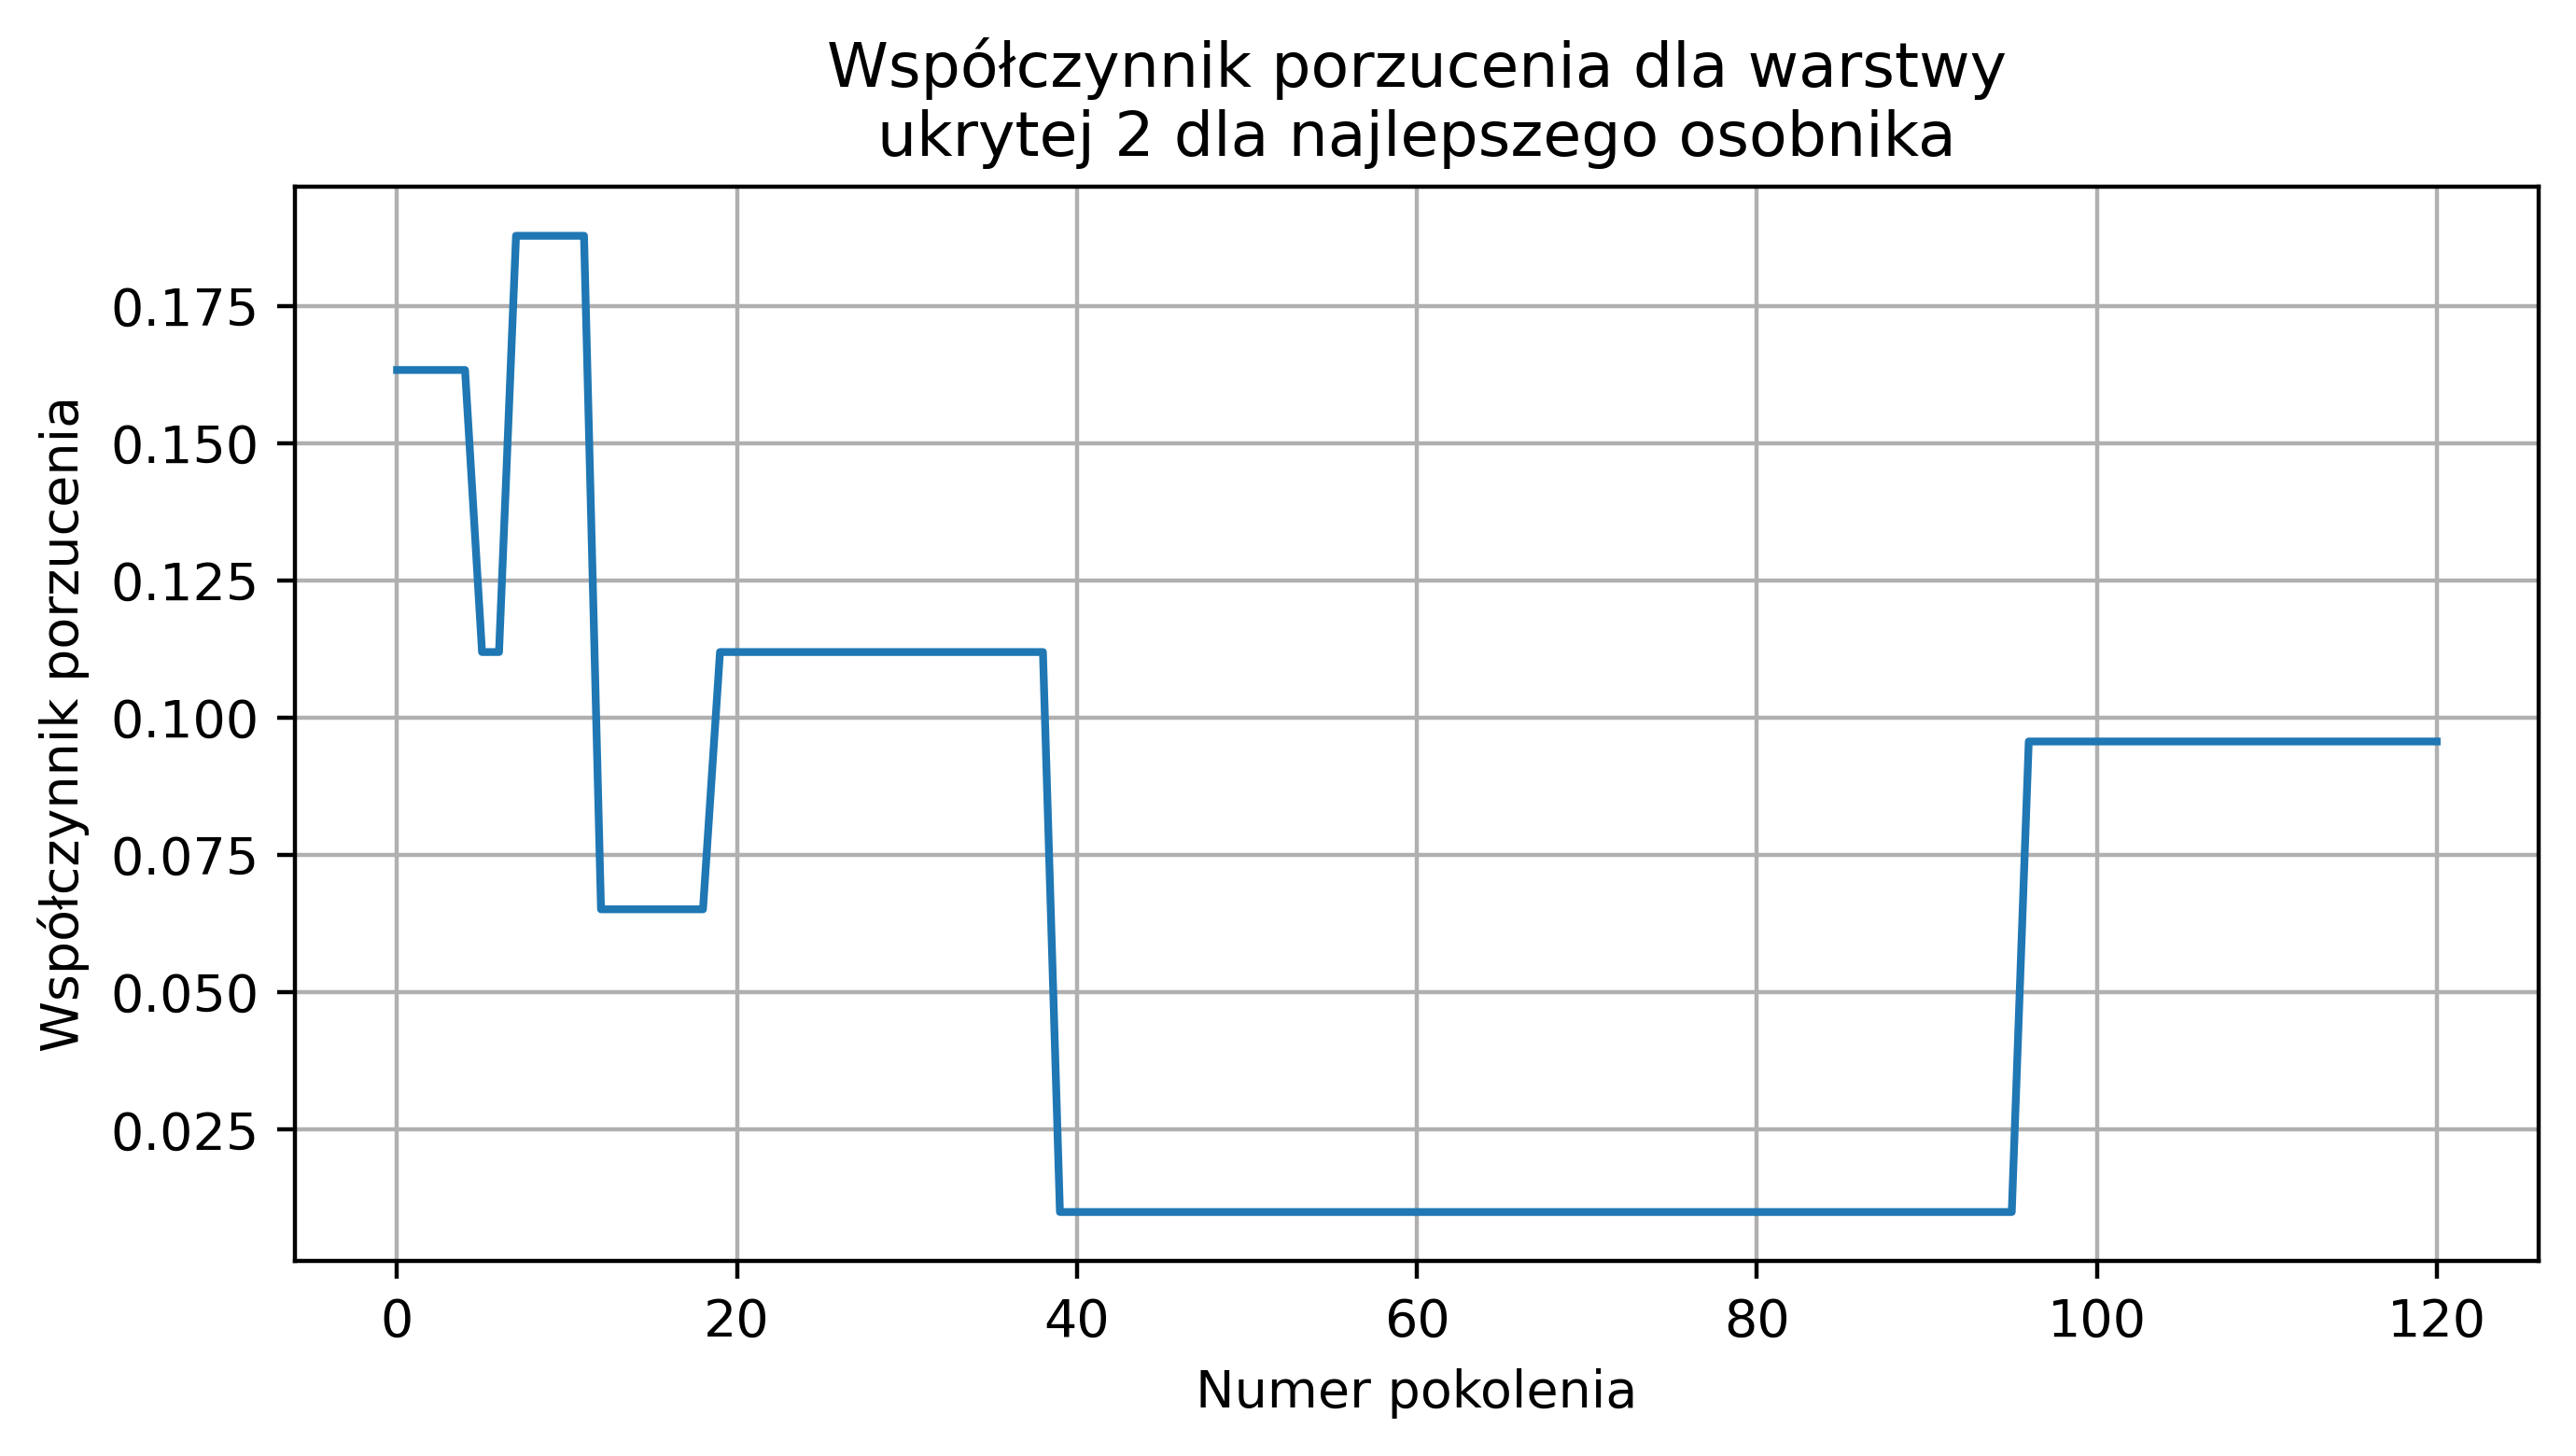

In [129]:
ax = best_genome_param_values.plot(x='generation_number', y='hidden_2_dropout_rate',
                                   title='\n'.join(
                                       wrap('Współczynnik porzucenia dla warstwy ukrytej 2 dla najlepszego osobnika',
                                            40)), grid=True, legend=False, figsize=(7, 4))
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Współczynnik porzucenia', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_best_hidden_2_dropout_rate.eps')

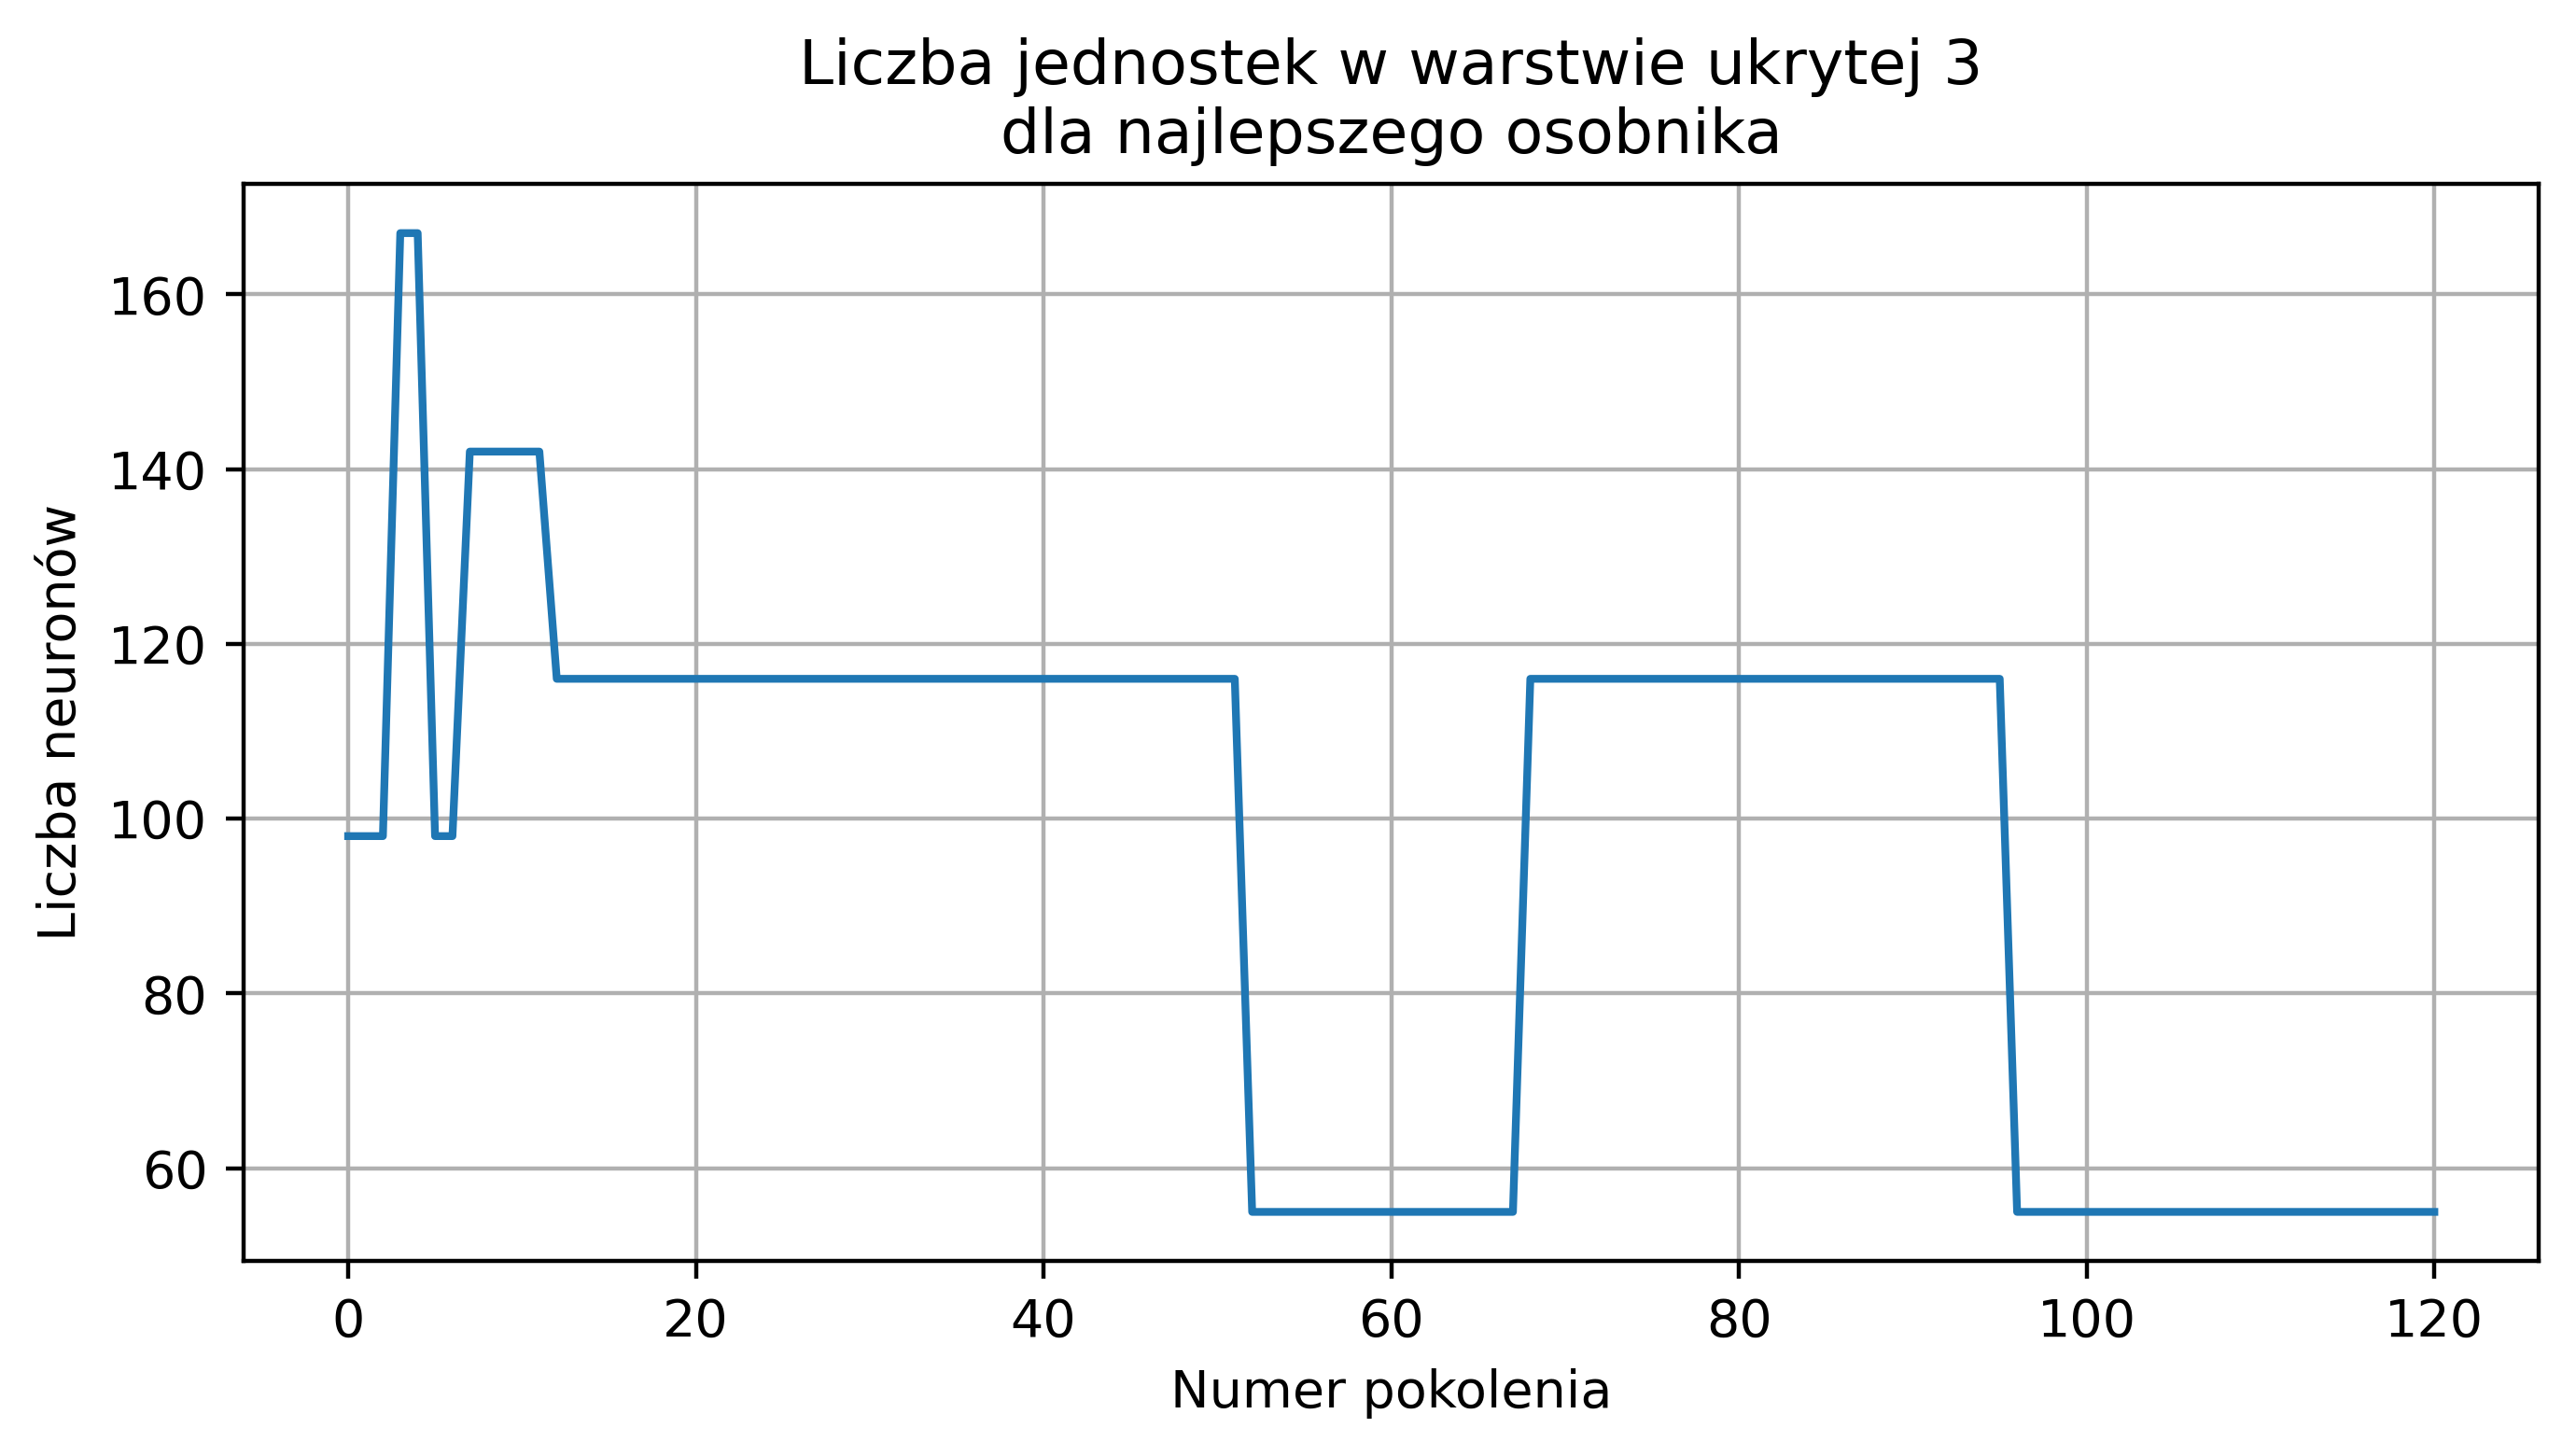

In [130]:
ax = best_genome_param_values.plot(x='generation_number', y='hidden_3_units',
                                   title='\n'.join(
                                       wrap('Liczba jednostek w warstwie ukrytej 3 dla najlepszego osobnika', 40)),
                                   grid=True, legend=False, figsize=(7, 4))
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Liczba neuronów', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_best_hidden_3_units.eps')

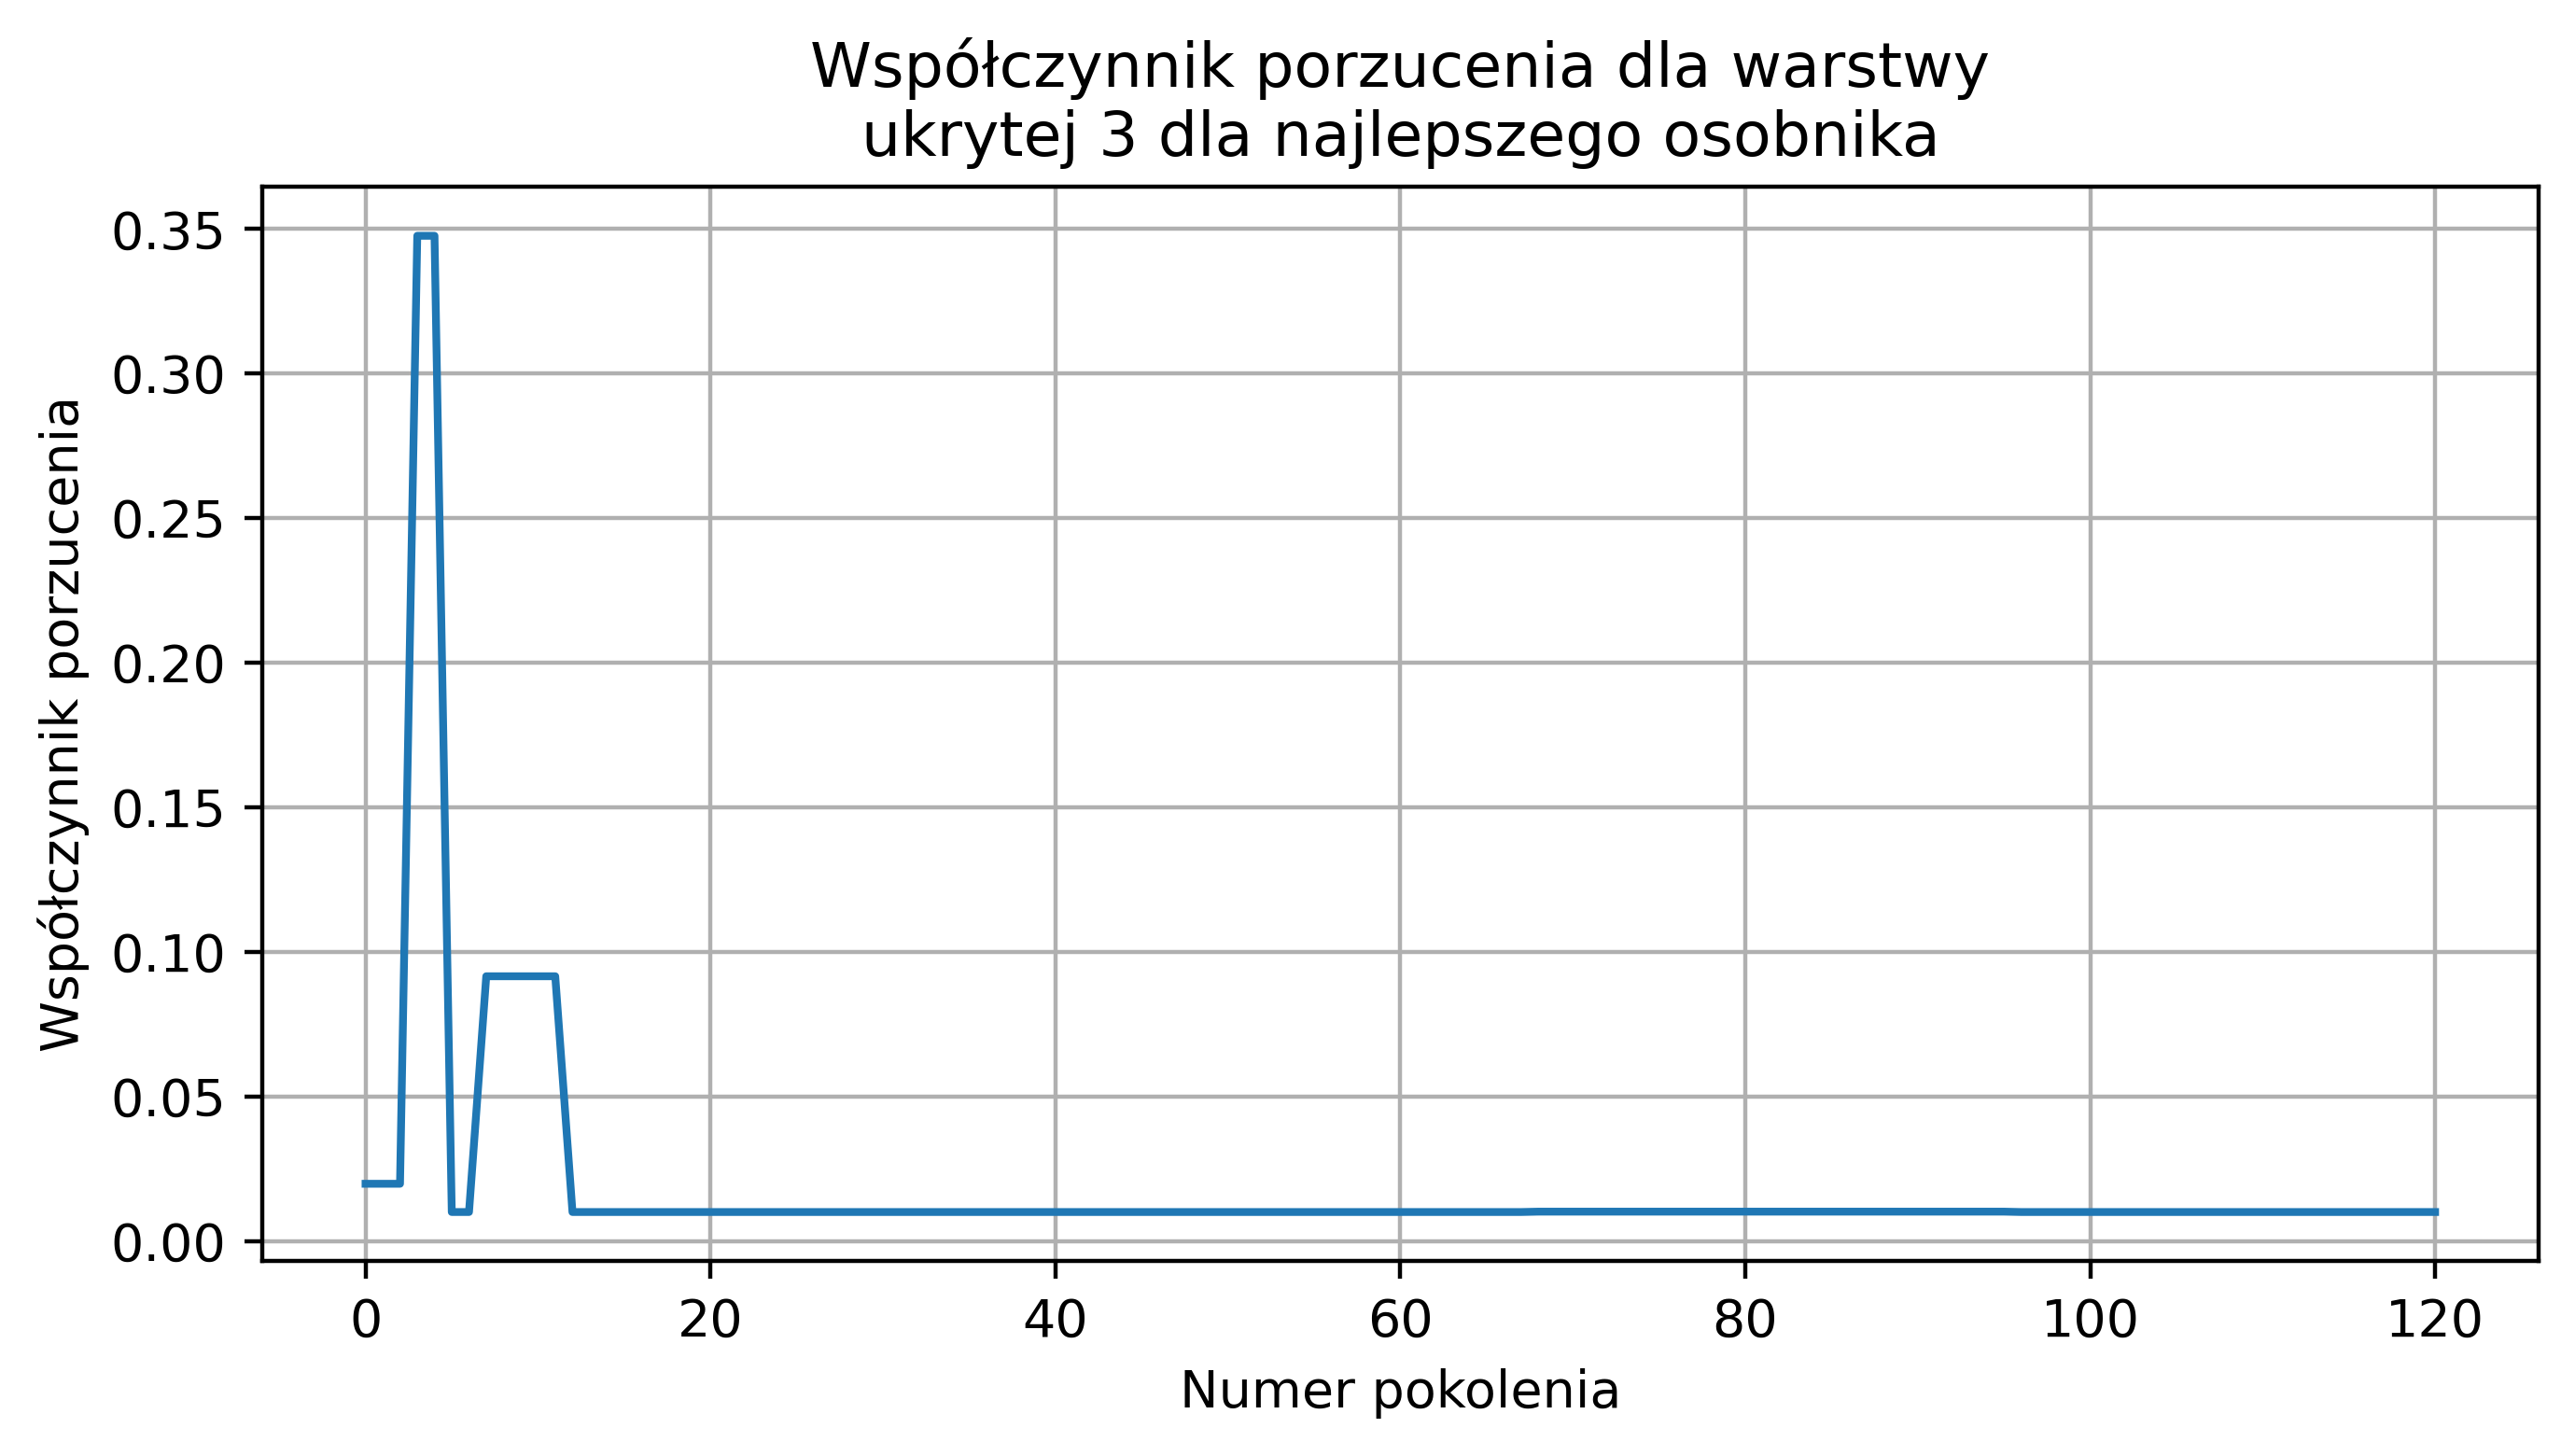

In [131]:
ax = best_genome_param_values.plot(x='generation_number', y='hidden_3_dropout_rate',
                                   title='\n'.join(
                                       wrap('Współczynnik porzucenia dla warstwy ukrytej 3 dla najlepszego osobnika',
                                            40)), grid=True, legend=False, figsize=(7, 4))
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Współczynnik porzucenia', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_best_hidden_3_dropout_rate.eps')

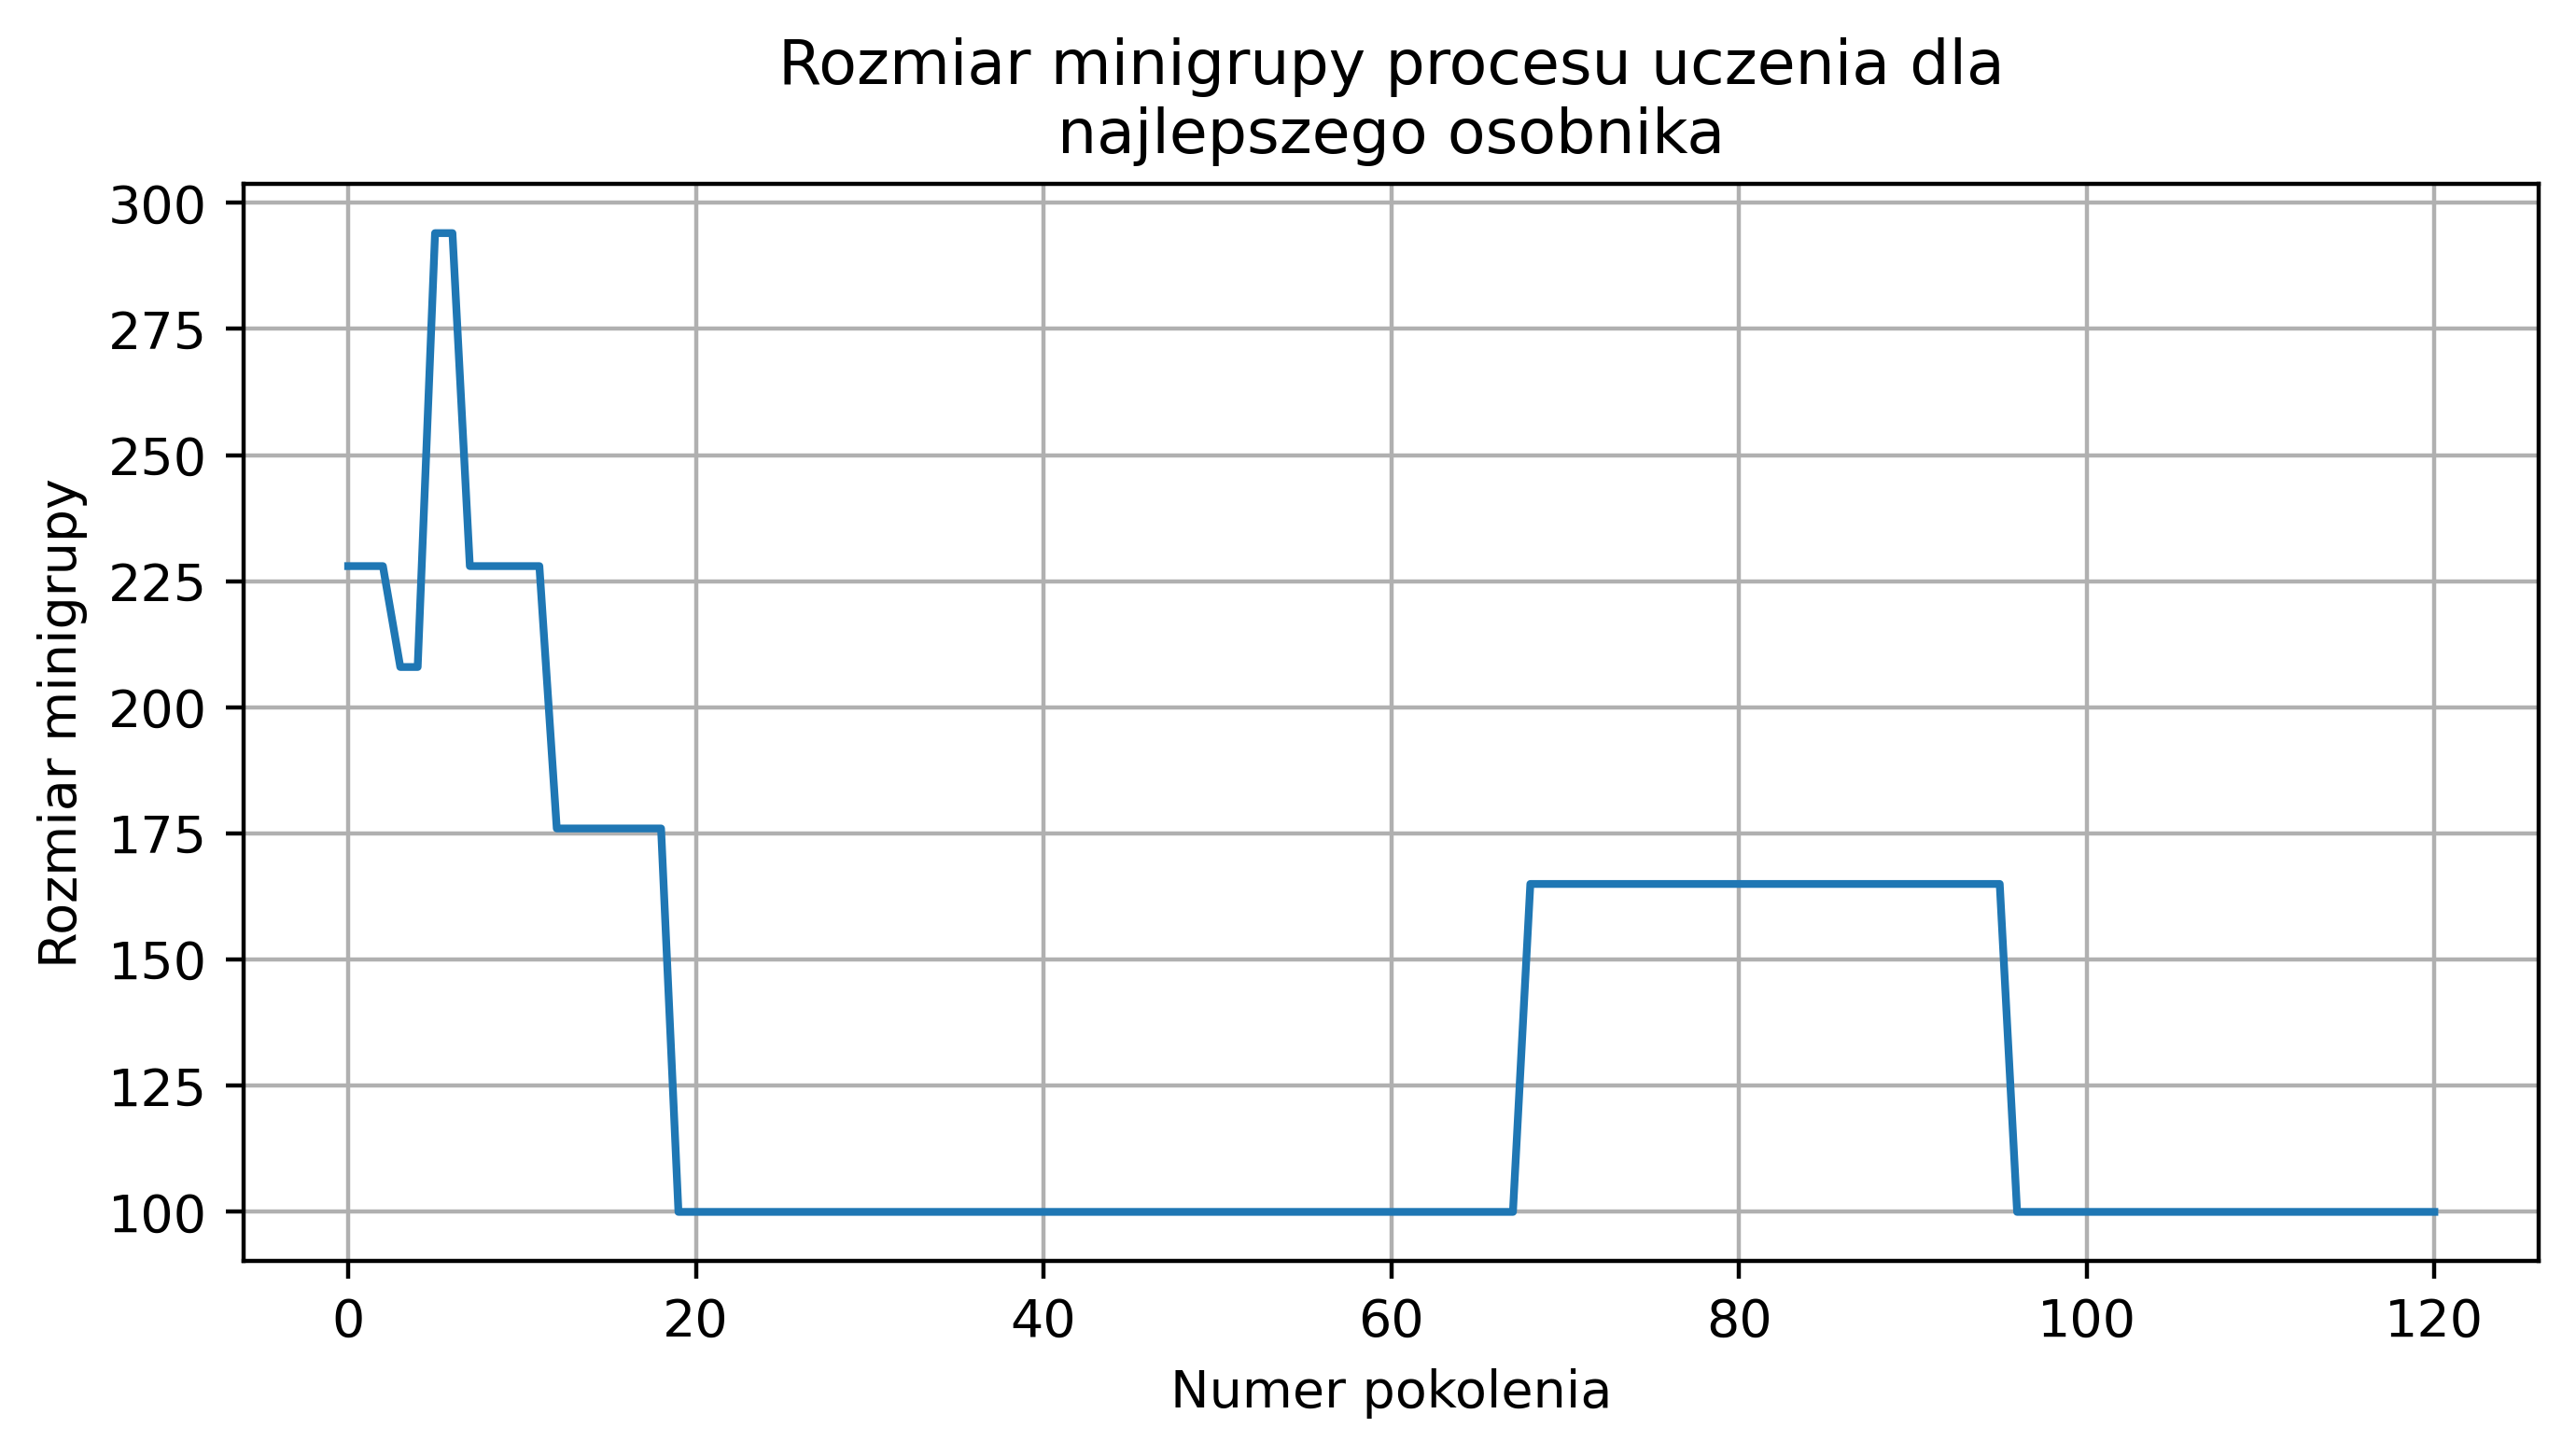

In [132]:
ax = best_genome_param_values.plot(x='generation_number', y='batch_size',
                                   title='\n'.join(
                                       wrap('Rozmiar minigrupy procesu uczenia dla najlepszego osobnika', 40)),
                                   grid=True, legend=False, figsize=(7, 4))
ax.set_xlabel('Numer pokolenia')
ax.set_ylabel('\n'.join(wrap('Rozmiar minigrupy', 30)))
plt.tight_layout()
plt.savefig('plots\\g_a_best_batch_size.eps')

In [133]:
# read in all our data
final_model_results = pd.read_csv("../results/spotify_final_he_elu_adam_181_112_55_2022-01-24_21-45-22.csv", sep=";")

In [134]:
# look at a few rows of the results file
final_model_results.sample(5)

,epoch,loss,mean_absolute_error,mean_squared_error,rmse,val_loss,val_mean_absolute_error,val_mean_squared_error,val_rmse
29,29,100.360992,7.189134,100.360992,10.018033,97.149612,6.980185,97.149612,9.856450
10,10,103.871780,7.328438,103.871780,10.191751,99.671326,7.145526,99.671326,9.983553
34,34,100.526176,7.188610,100.526176,10.026275,97.596321,7.097975,97.596321,9.879085
45,45,99.183533,7.144269,99.183533,9.959093,96.760132,6.806228,96.760132,9.836673
12,12,103.225700,7.313394,103.225700,10.160005,98.920647,6.845312,98.920647,9.945886


In [135]:
# get info about DataFrame columns
final_model_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   epoch                    61 non-null     int64  
 1   loss                     61 non-null     float64
 2   mean_absolute_error      61 non-null     float64
 3   mean_squared_error       61 non-null     float64
 4   rmse                     61 non-null     float64
 5   val_loss                 61 non-null     float64
 6   val_mean_absolute_error  61 non-null     float64
 7   val_mean_squared_error   61 non-null     float64
 8   val_rmse                 61 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 4.4 KB


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


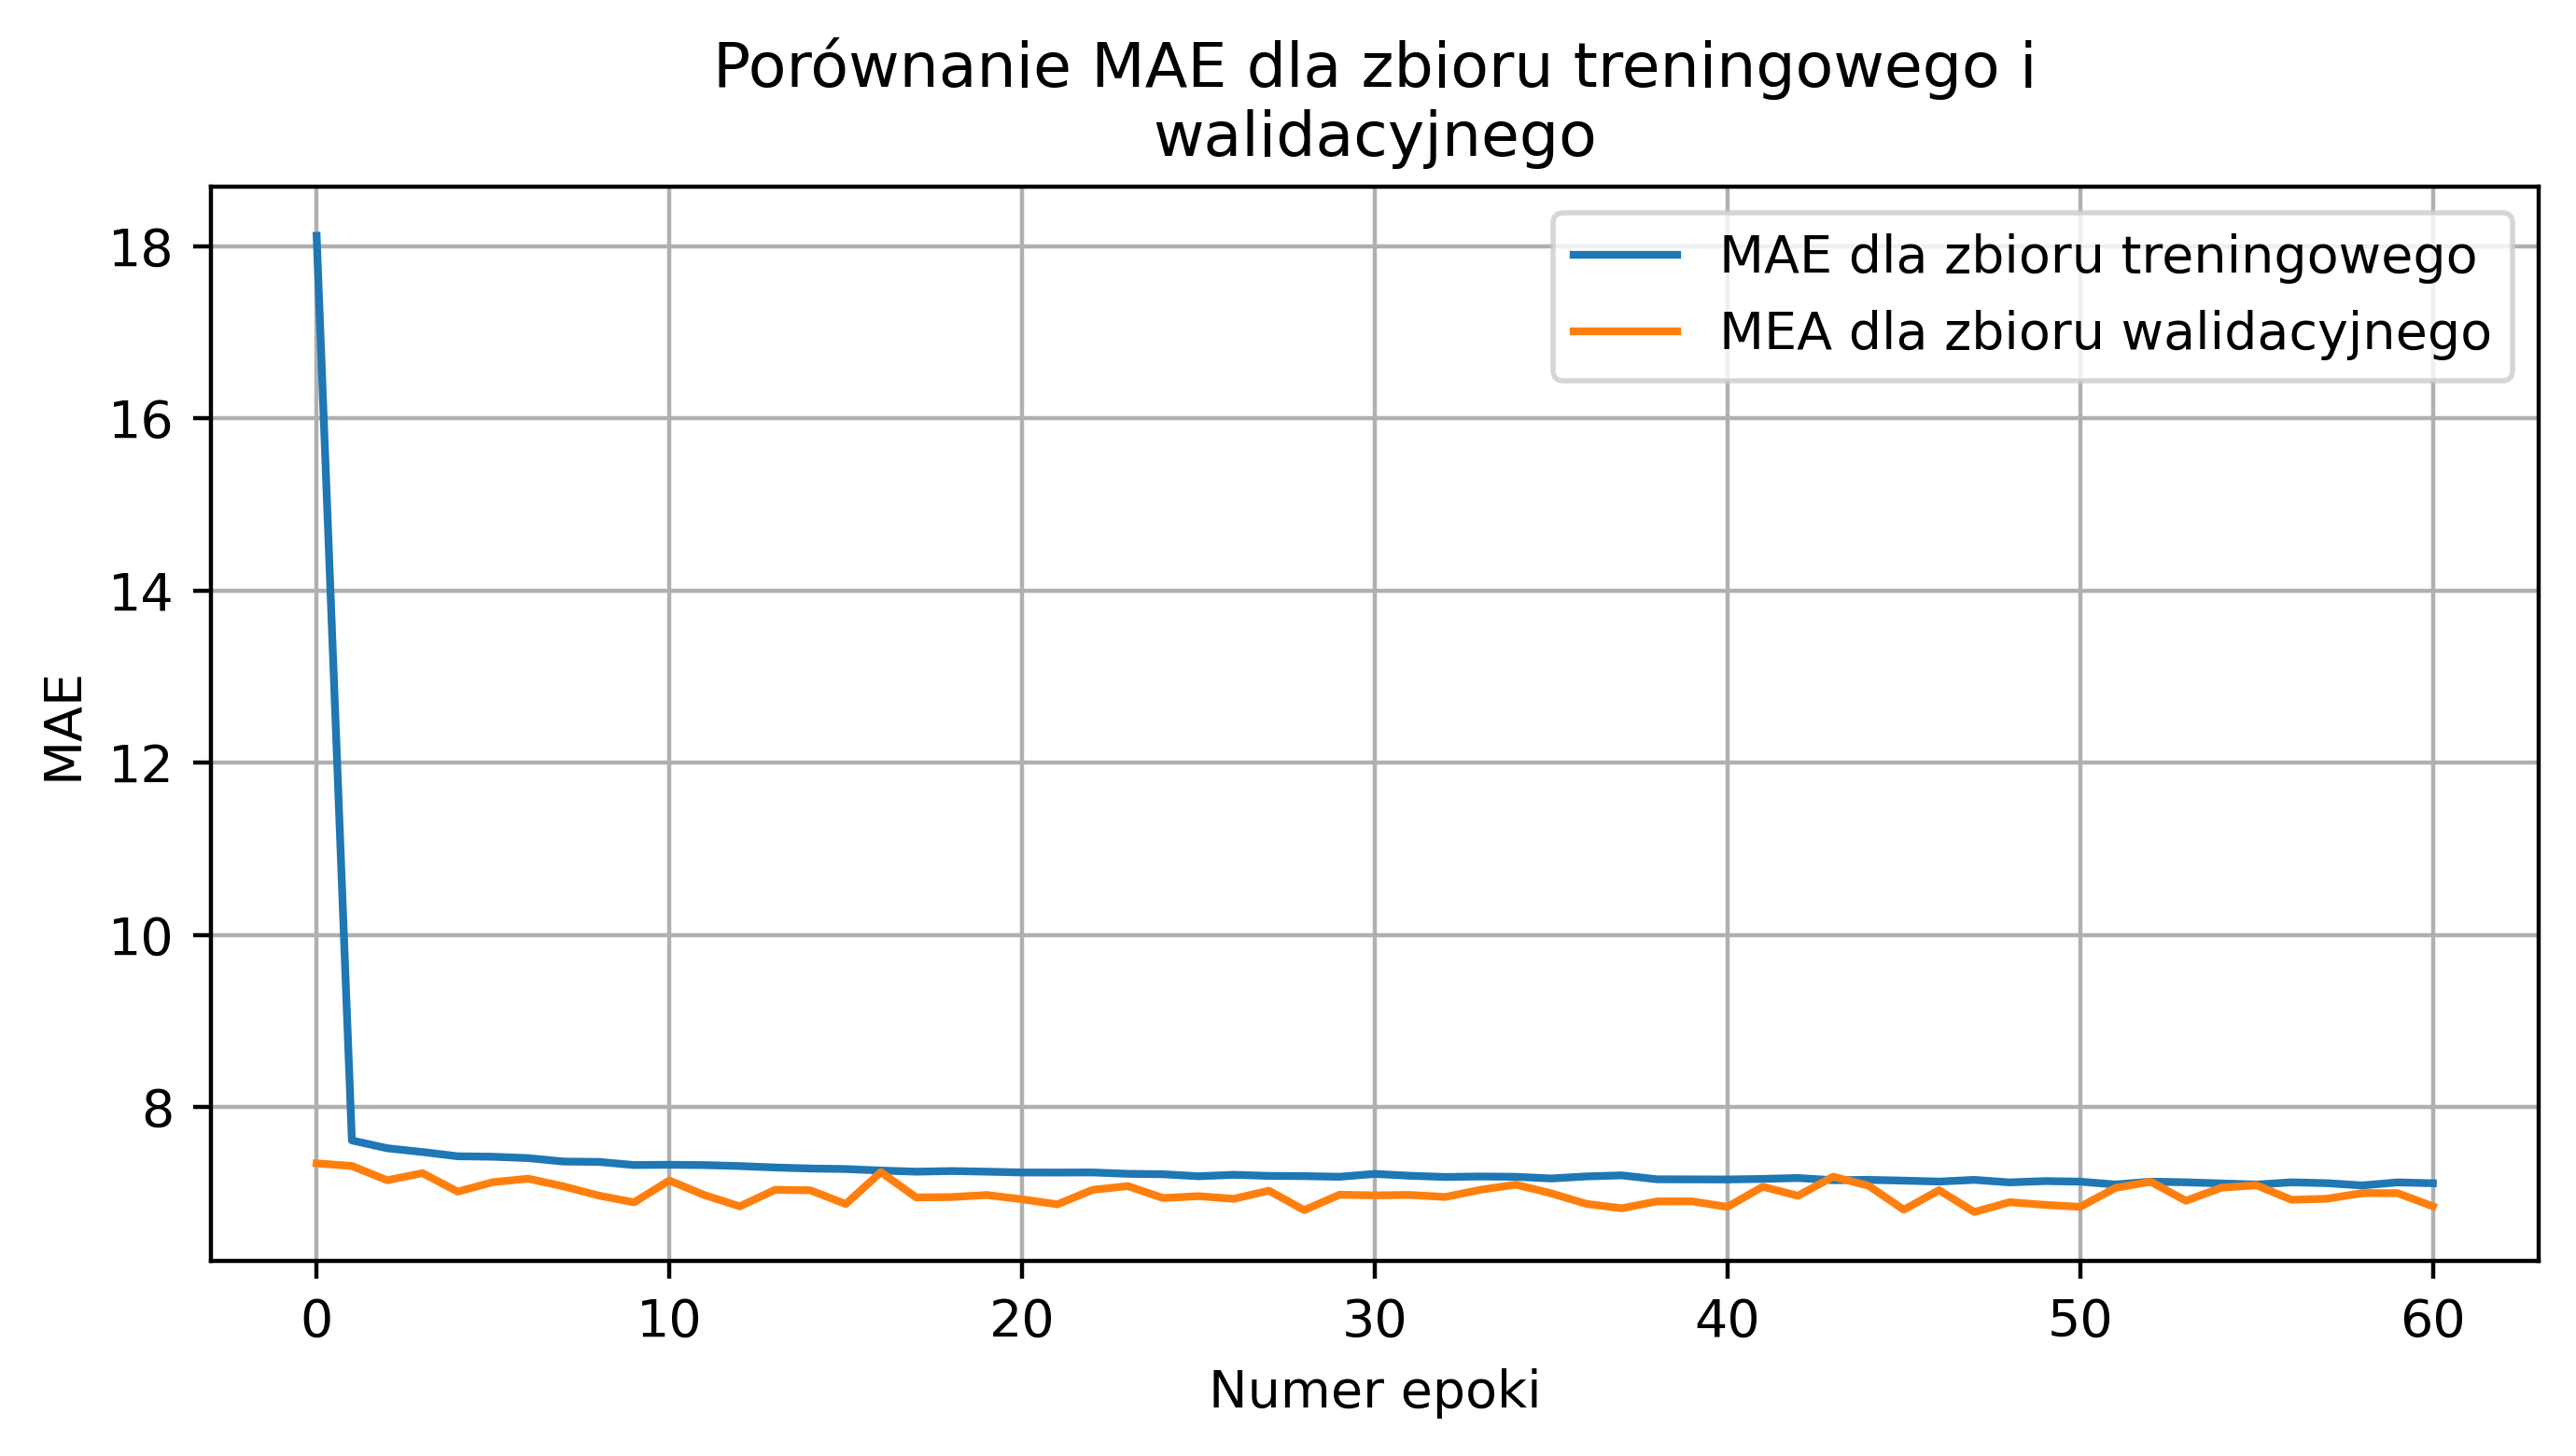

In [136]:
ax = final_model_results.plot(x='epoch', y=['mean_absolute_error', 'val_mean_absolute_error'],
                              title='\n'.join(wrap('Porównanie MAE dla zbioru treningowego i walidacyjnego', 40)),
                              grid='True', figsize=(7, 4))
ax.set_xlabel('Numer epoki')
ax.set_ylabel('MAE')
ax.legend(['MAE dla zbioru treningowego', 'MEA dla zbioru walidacyjnego'])
plt.tight_layout()
plt.savefig('plots\\f_m_mae_train_valid.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


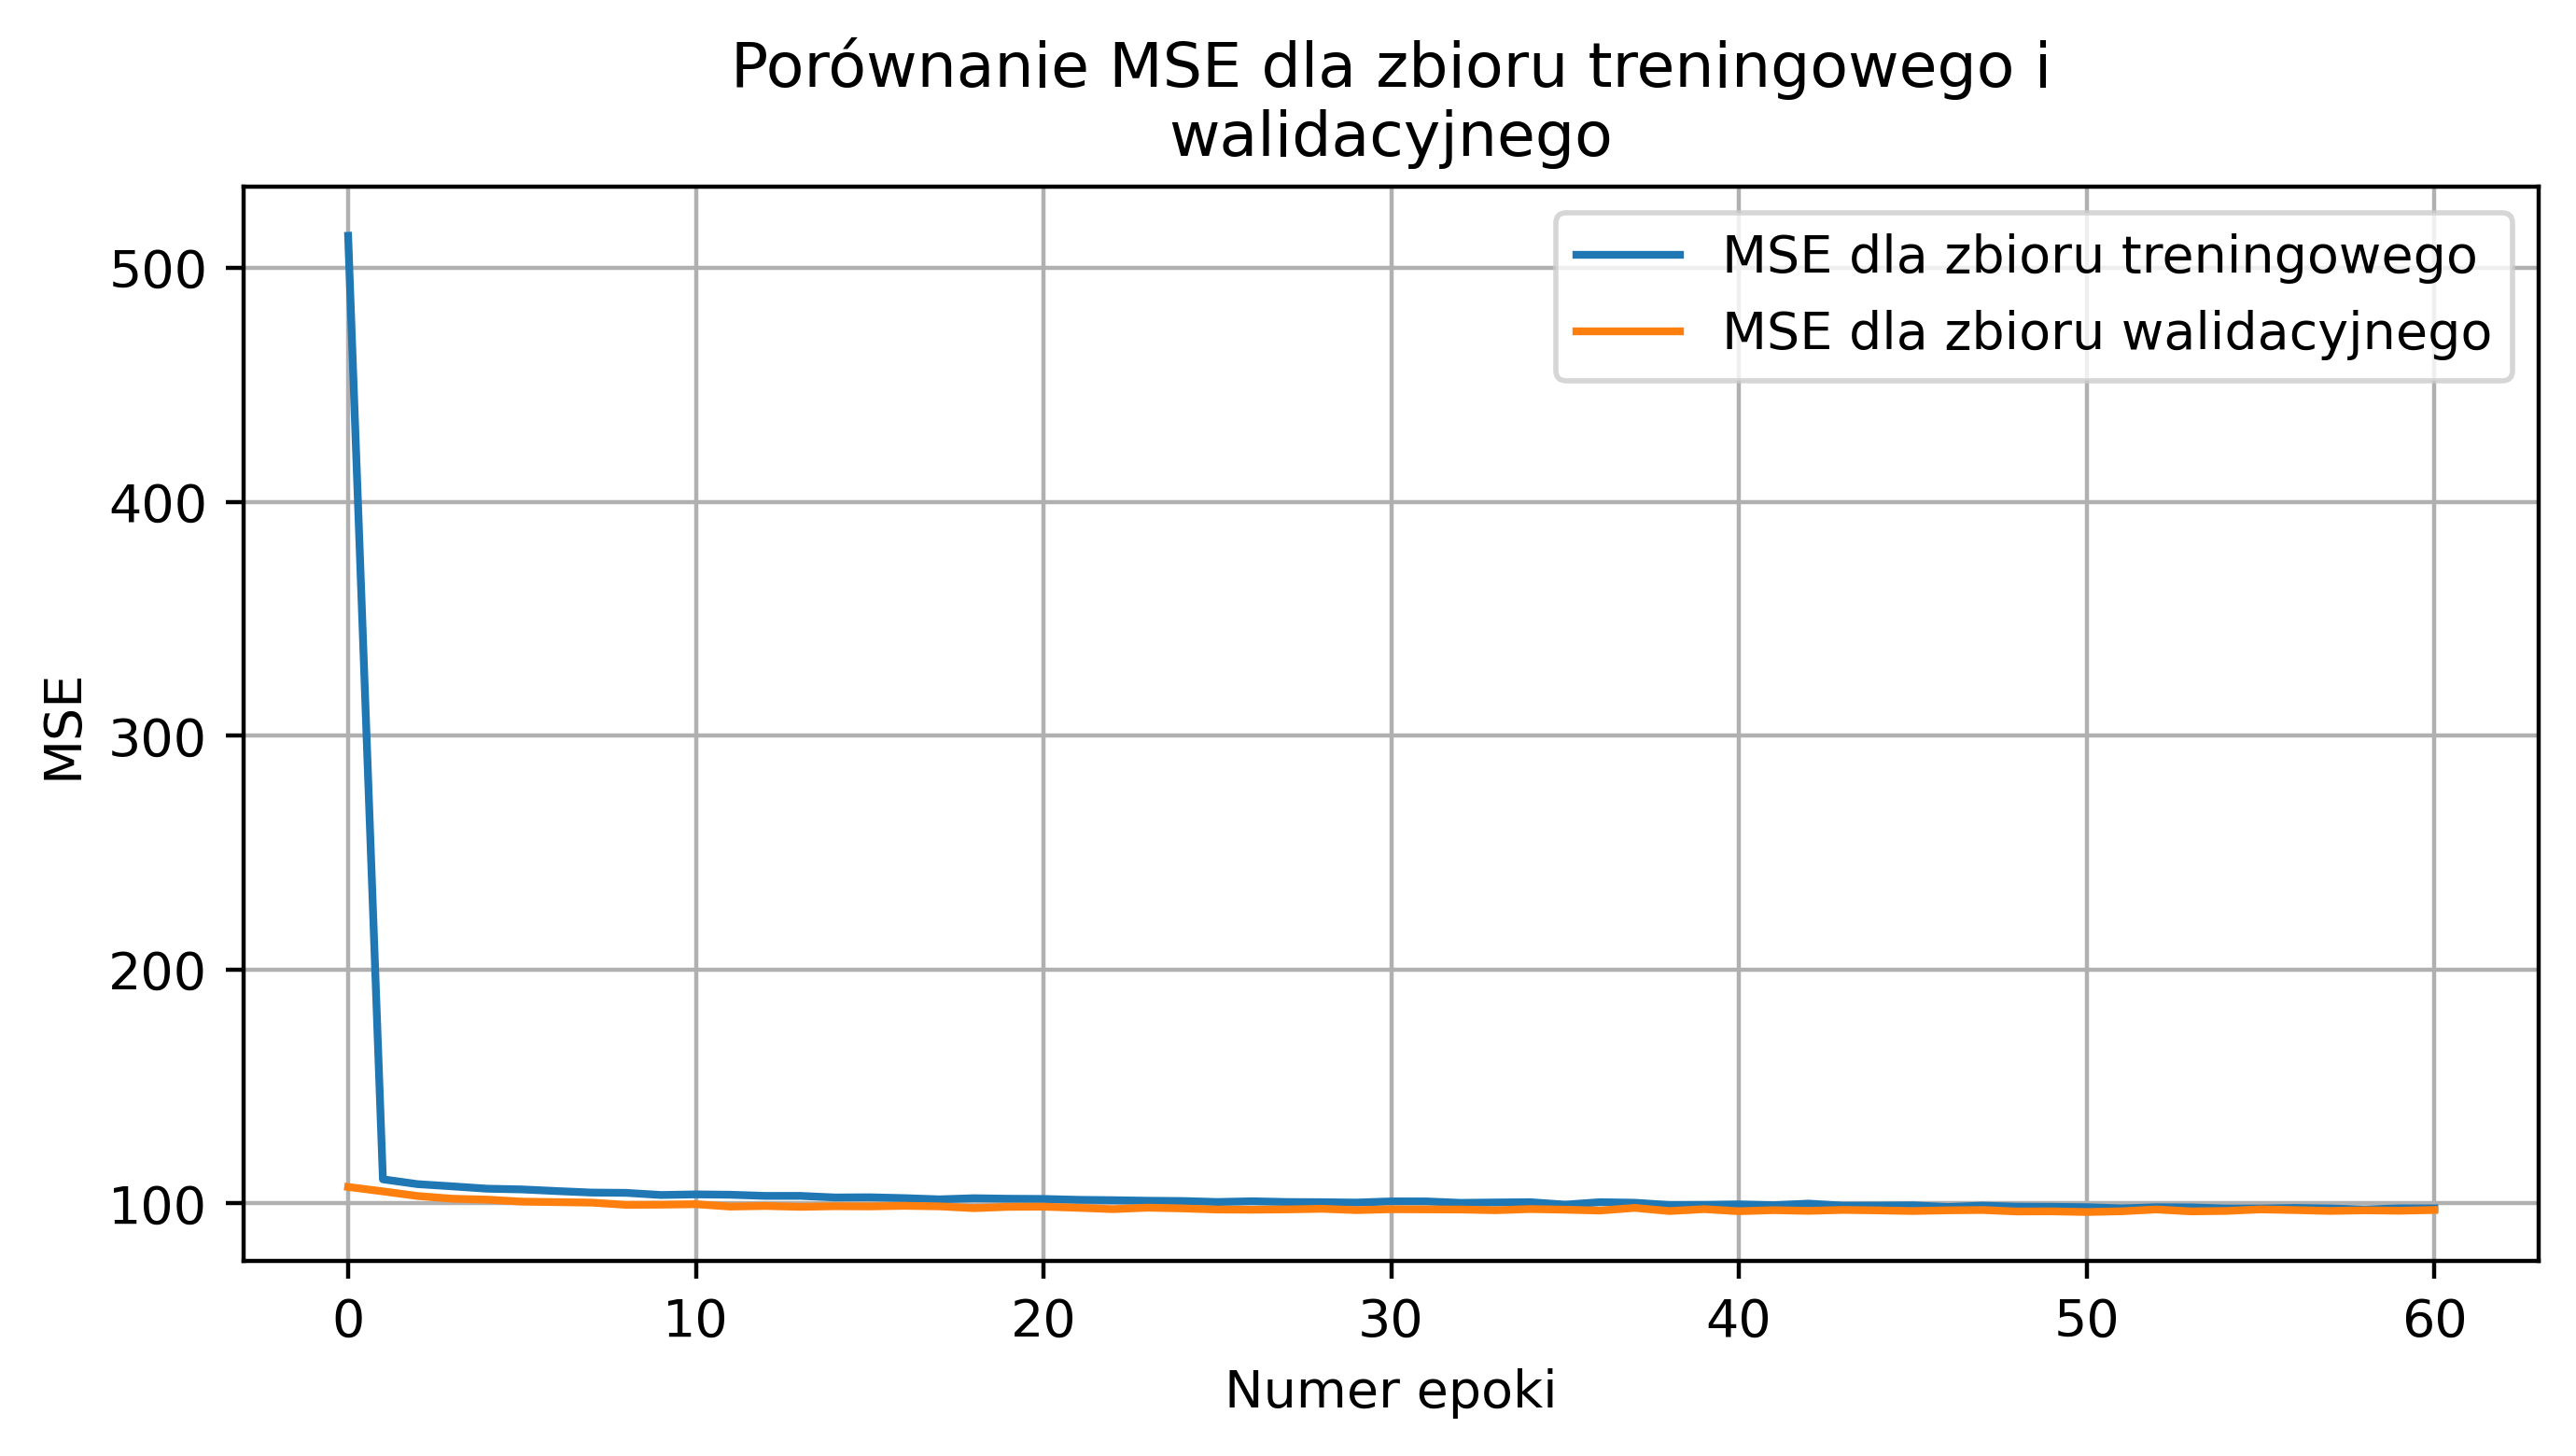

In [137]:
ax = final_model_results.plot(x='epoch', y=['mean_squared_error', 'val_mean_squared_error'],
                              title='\n'.join(wrap('Porównanie MSE dla zbioru treningowego i walidacyjnego', 40)),
                              grid='True', figsize=(7, 4))
ax.set_xlabel('Numer epoki')
ax.set_ylabel('MSE')
ax.legend(['MSE dla zbioru treningowego', 'MSE dla zbioru walidacyjnego'])
plt.tight_layout()
plt.savefig('plots\\f_m_mse_train_valid.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


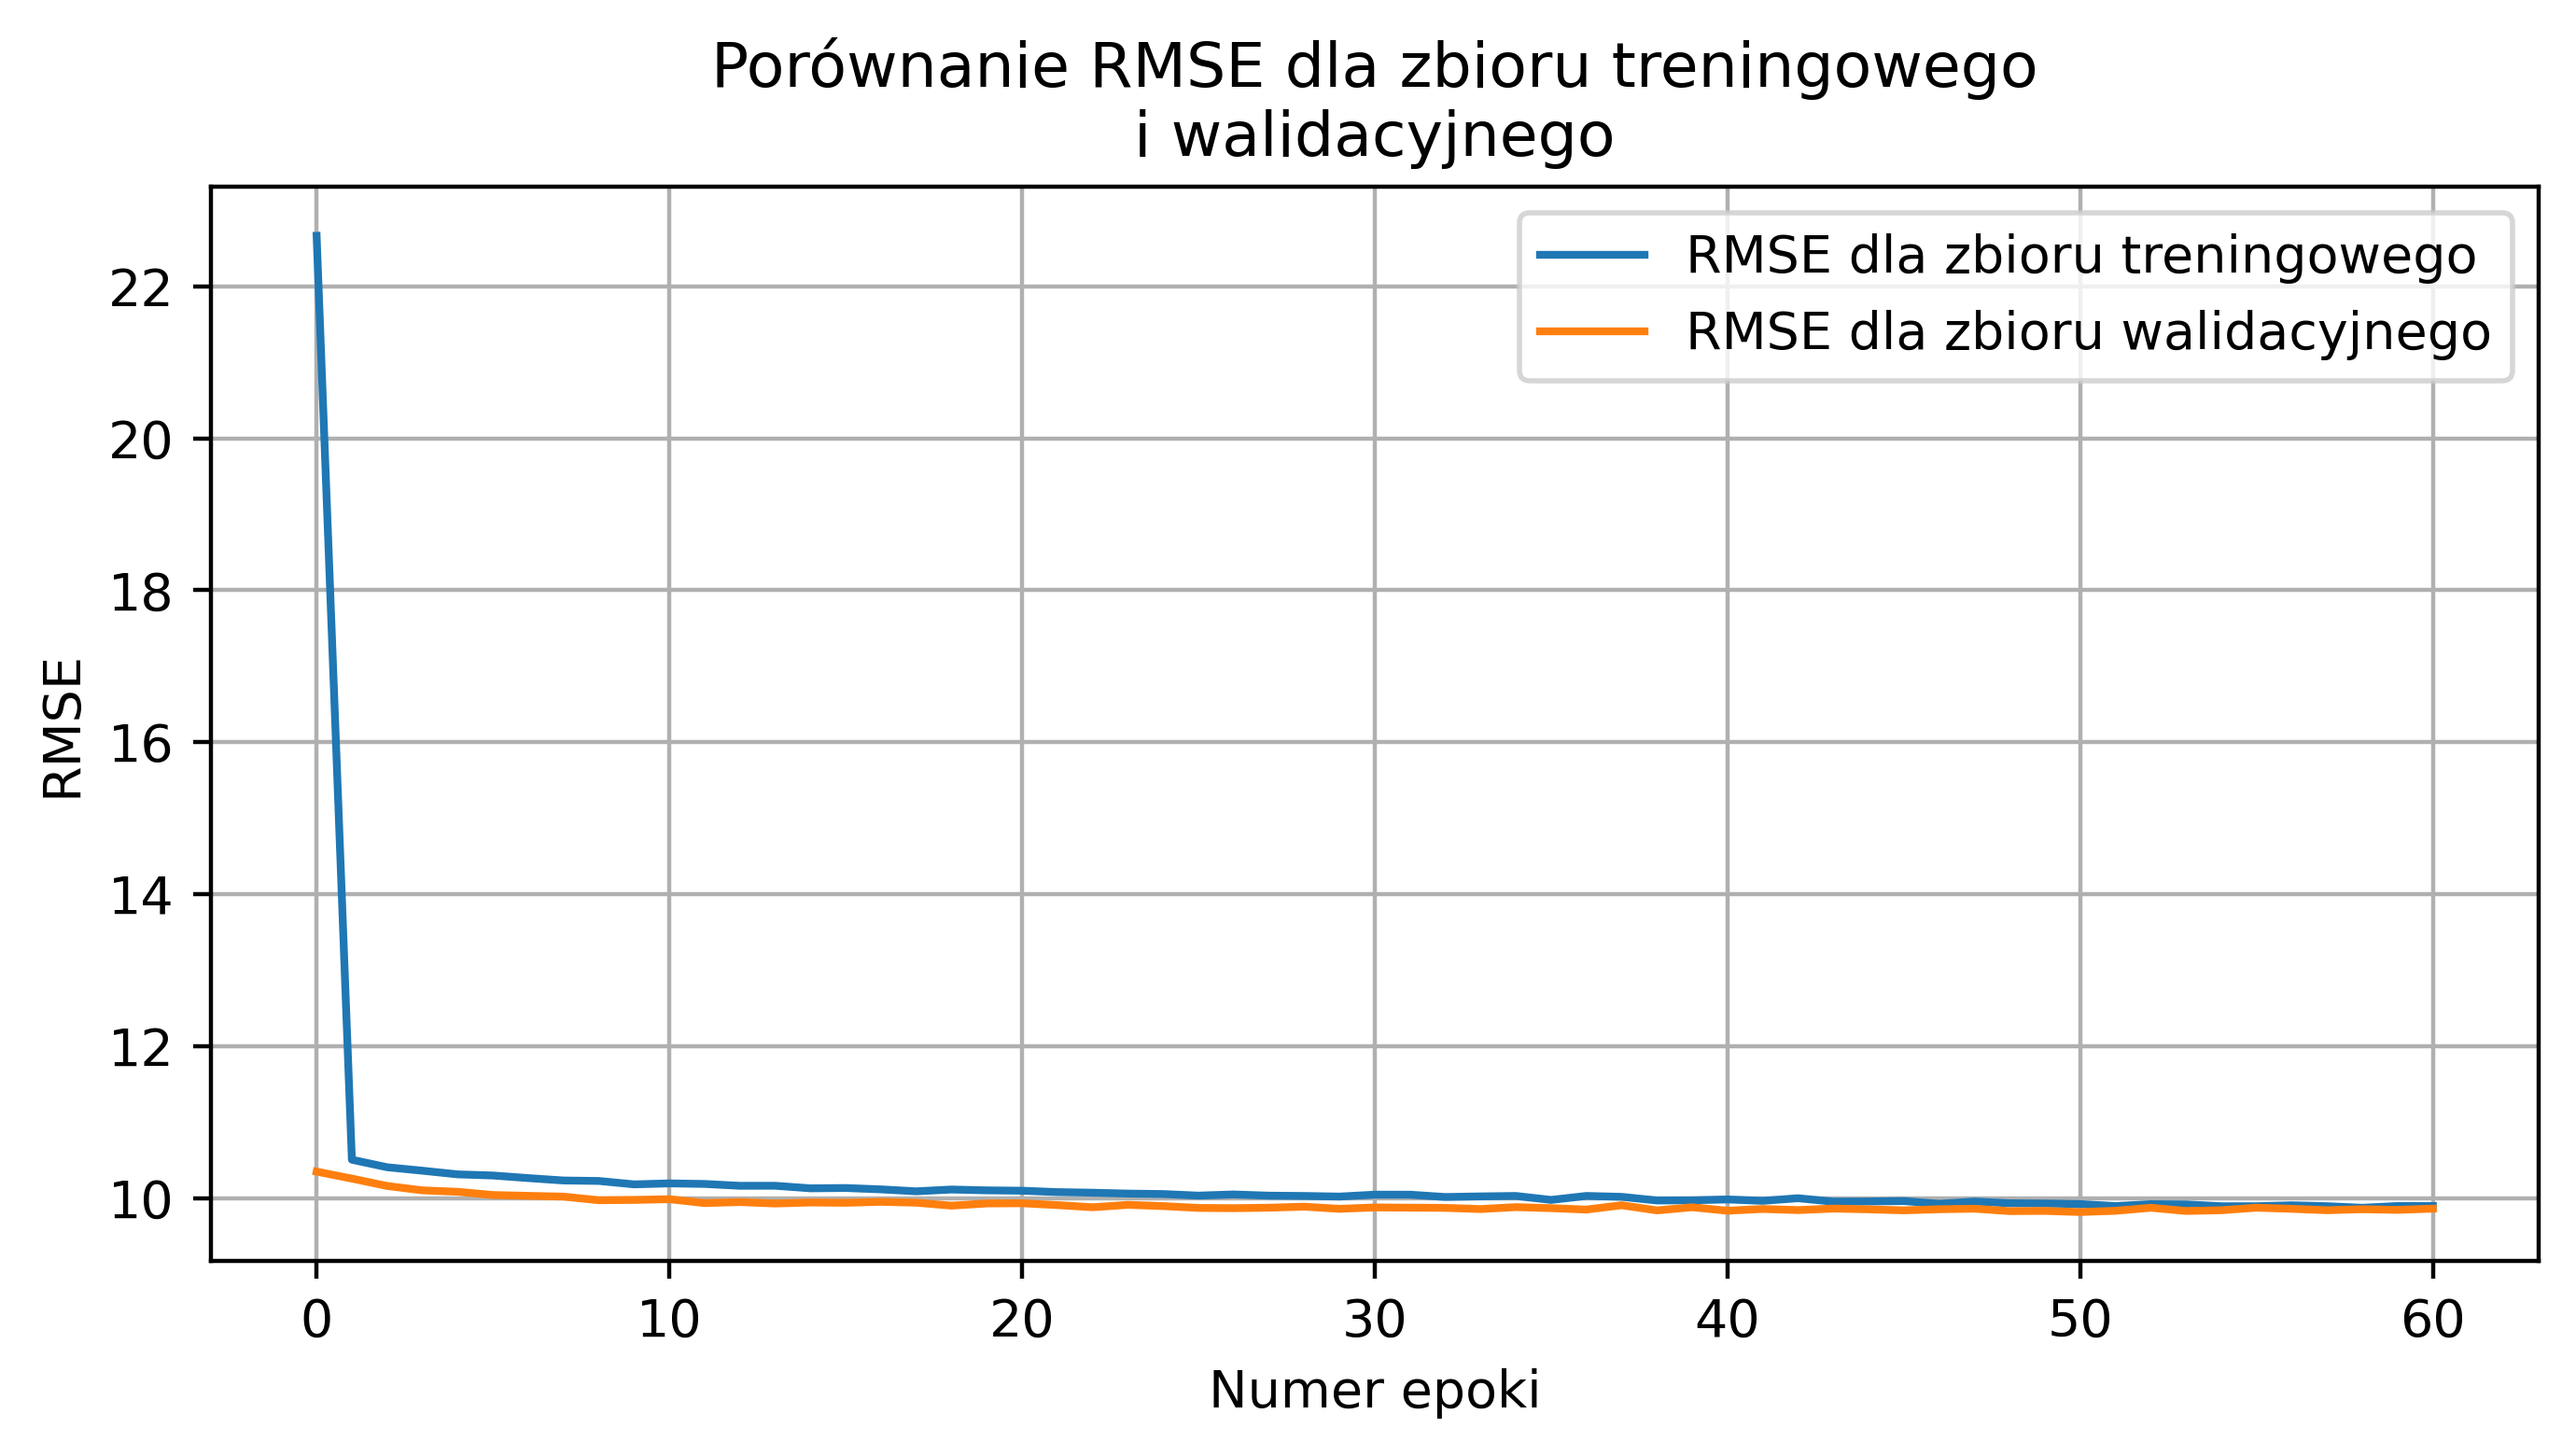

In [138]:
ax = final_model_results.plot(x='epoch', y=['rmse', 'val_rmse'],
                              title='\n'.join(wrap('Porównanie RMSE dla zbioru treningowego i walidacyjnego', 40)),
                              grid='True', figsize=(7, 4))
ax.set_xlabel('Numer epoki')
ax.set_ylabel('RMSE')
ax.legend(['RMSE dla zbioru treningowego', 'RMSE dla zbioru walidacyjnego'])
plt.tight_layout()
plt.savefig('plots\\f_m_rmse_train_valid.eps')